# Projet 4 : Anticipez les besoins en consommation électrique de bâtiments

# Nettoyage des données

In [4]:
 #importation des librairies nécessaires
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

In [5]:
# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

In [6]:
#importation du jeu de données
data = pd.read_csv("2016_Building_Energy_Benchmarking.csv", sep=",")

In [7]:
data.head(3)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   

              PropertyName          Address     City State  ZipCode  \
0     Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1          Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2  5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   

   PropertyGFAParking  PropertyGFABuilding(s)   ListOfAllPropertyUseTypes  \
0                   0                   88434                       Hotel   
1               15064                   88502  Hotel, Parking, Restaurant   
2              196718                  759392                       Hotel   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2           97.699997          241.899994            244.100006   

   SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0            7226362.5              7456910.0       2003882.0   
1            8387933.0              8664479.0             0.0   
2           72587024.0             73937112.0      21566554.0   

   Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
0      1.156514e+06          3946027.0         12764.52930         1276453.0   
1      9.504252e+05          3242851.0         51450.81641         5145082.0   
2      1.451544e+07         49526664.0         14938.00000         1493800.0   

   DefaultData  Comments ComplianceStatus Outlier  TotalGHGEmissions  \
0        False       NaN        Compliant     NaN             249.98   
1        False       NaN        Compliant     NaN             295.86   
2        False       NaN        Compliant     NaN            2089.28   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86  
2                   2.19

In [8]:
data.reset_index(drop=True)
print('Le jeu des données compte {} colonnes et {} lignes.'.format(data.shape[1], data.shape[0]))

Le jeu des données compte 46 colonnes et 3376 lignes.


In [9]:
data.describe(include='all')

OSEBuildingID  DataYear    BuildingType   PrimaryPropertyType  \
count     3376.000000    3376.0            3376                  3376   
unique            NaN       NaN               8                    24   
top               NaN       NaN  NonResidential  Low-Rise Multifamily   
freq              NaN       NaN            1460                   987   
mean     21208.991114    2016.0             NaN                   NaN   
std      12223.757015       0.0             NaN                   NaN   
min          1.000000    2016.0             NaN                   NaN   
25%      19990.750000    2016.0             NaN                   NaN   
50%      23112.000000    2016.0             NaN                   NaN   
75%      25994.250000    2016.0             NaN                   NaN   
max      50226.000000    2016.0             NaN                   NaN   

           PropertyName            Address     City State       ZipCode  \
count              3376               3376     3376  3376   3360.000000   
unique             3362               3354        1     1           NaN   
top     Northgate Plaza  2600 SW Barton St  Seattle    WA           NaN   
freq                  3                  4     3376  3376           NaN   
mean                NaN                NaN      NaN   NaN  98116.949107   
std                 NaN                NaN      NaN   NaN     18.615205   
min                 NaN                NaN      NaN   NaN  98006.000000   
25%                 NaN                NaN      NaN   NaN  98105.000000   
50%                 NaN                NaN      NaN   NaN  98115.000000   
75%                 NaN                NaN      NaN   NaN  98122.000000   
max                 NaN                NaN      NaN   NaN  98272.000000   

       TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
count                           3376          3376.000000         3376   
unique                          3268                  NaN           19   
top                       1625049001                  NaN     DOWNTOWN   
freq                               8                  NaN          573   
mean                             NaN             4.439277          NaN   
std                              NaN             2.120625          NaN   
min                              NaN             1.000000          NaN   
25%                              NaN             3.000000          NaN   
50%                              NaN             4.000000          NaN   
75%                              NaN             7.000000          NaN   
max                              NaN             7.000000          NaN   

           Latitude    Longitude    YearBuilt  NumberofBuildings  \
count   3376.000000  3376.000000  3376.000000        3368.000000   
unique          NaN          NaN          NaN                NaN   
top             NaN          NaN          NaN                NaN   
freq            NaN          NaN          NaN                NaN   
mean      47.624033  -122.334795  1968.573164           1.106888   
std        0.047758     0.027203    33.088156           2.108402   
min       47.499170  -122.414250  1900.000000           0.000000   
25%       47.599860  -122.350662  1948.000000           1.000000   
50%       47.618675  -122.332495  1975.000000           1.000000   
75%       47.657115  -122.319407  1997.000000           1.000000   
max       47.733870  -122.220966  2015.000000         111.000000   

        NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count      3376.000000      3.376000e+03         3376.000000   
unique             NaN               NaN                 NaN   
top                NaN               NaN                 NaN   
freq               NaN               NaN                 NaN   
mean          4.709123      9.483354e+04         8001.526066   
std           5.494465      2.188376e+05        32326.723928   
min           0.000000      1.128500e+04            0.000000   
25%         

In [10]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [11]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

# Variables catégorielles et numériques

## Variables catégorielles

In [12]:
# Les colonnes object dtypes sont séléctionnés
obj_columns = list(data.select_dtypes(include=['object', 'bool']).columns)

In [13]:
print("Les variables catégorielles sont les suivantes : \n")
for categ in obj_columns :
    print(categ, ":", data[categ].nunique())

Les variables catégorielles sont les suivantes : 

BuildingType : 8
PrimaryPropertyType : 24
PropertyName : 3362
Address : 3354
City : 1
State : 1
TaxParcelIdentificationNumber : 3268
Neighborhood : 19
ListOfAllPropertyUseTypes : 466
LargestPropertyUseType : 56
SecondLargestPropertyUseType : 50
ThirdLargestPropertyUseType : 44
YearsENERGYSTARCertified : 65
DefaultData : 2
ComplianceStatus : 4
Outlier : 2


## Variables numériques


In [14]:
# Les colonnes float64 sont séléctionnés
num_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
print("Les variables numériques sont les suivantes : \n")
for num in num_columns :
    print(num)

Les variables numériques sont les suivantes : 

OSEBuildingID
DataYear
ZipCode
CouncilDistrictCode
Latitude
Longitude
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
Comments
TotalGHGEmissions
GHGEmissionsIntensity


# Nettoyage du dataset

In [15]:
# la fonction suivante nous permet de visualiser le taux des valeurs manquantes par colonne

def manquant_graphique_h (data, thresh=80, color='black', edgecolor='blue', width=20, height=5):
    
    plt.figure(figsize=(width,height), dpi=600)
    percentage = 100 - (data.isnull().mean())*100
    hline = 100 - (data['ENERGYSTARScore'].isnull().mean())*100
    ax = percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    ax.annotate('EnergyStar {} %'.format(round(hline, ndigits=1)), xy =(38, 77),
                xytext =(38, 97), 
                arrowprops = dict(facecolor ='darkred',
                                  shrink = 0.05),
                color='darkred',
                weight ='bold',
                size=14
               )
    plt.axhline(y=hline, color='darkred', linestyle='-')
    plt.title('Le pourcentage de remplissage par colonne', pad=50)
    plt.xlabel('Les colonnes', size=18, weight='bold')
    plt.ylabel('Le pourcentage de valeurs présentes', size=13, weight='bold')
    plt.yticks(weight ='bold', size=12)
    plt.xticks(weight ='bold', size=14)
    
    return plt.show()

In [16]:
manquant_graphique_h (data, 10, color='lightblue')

In [17]:
# la fonction suivante nous permet de voir le taux des valeurs manquantes par colonne

def manquant(df):
    """ Input : un dataset
        Output : un tableau qui contient 
                                        le nombre des valeurs manquantes
                                        le nombre des valeurs présentes
                                        taux de valeurs présentes
    """
    manquant_df = df.isnull().sum(axis=0).reset_index()
    manquant_df.columns = ['column_name', 'nb_manquant']
    manquant_df['nb_present'] = df.shape[0] - manquant_df['nb_manquant']
    manquant_df['Taux de remplissage'] = (
        df.shape[0] - manquant_df['nb_manquant']) / df.shape[0] * 100
    manquant_df = manquant_df.sort_values('nb_present').reset_index(drop=True)
    return manquant_df

In [18]:
manquant(data)

column_name  nb_manquant  nb_present  \
0                          Comments         3376           0   
1                           Outlier         3344          32   
2          YearsENERGYSTARCertified         3257         119   
3       ThirdLargestPropertyUseType         2780         596   
4    ThirdLargestPropertyUseTypeGFA         2780         596   
5      SecondLargestPropertyUseType         1697        1679   
6   SecondLargestPropertyUseTypeGFA         1697        1679   
7                   ENERGYSTARScore          843        2533   
8         LargestPropertyUseTypeGFA           20        3356   
9            LargestPropertyUseType           20        3356   
10                          ZipCode           16        3360   
11                TotalGHGEmissions            9        3367   
12             SourceEUIWN(kBtu/sf)            9        3367   
13                   SteamUse(kBtu)            9        3367   
14                 Electricity(kWh)            9        3367   
15                Electricity(kBtu)            9        3367   
16               NaturalGas(therms)            9        3367   
17                 NaturalGas(kBtu)            9        3367   
18               SourceEUI(kBtu/sf)            9        3367   
19        ListOfAllPropertyUseTypes            9        3367   
20            GHGEmissionsIntensity            9        3367   
21                NumberofBuildings            8        3368   
22                 SiteEUI(kBtu/sf)            7        3369   
23               SiteEUIWN(kBtu/sf)            6        3370   
24            SiteEnergyUseWN(kBtu)            6        3370   
25              SiteEnergyUse(kBtu)            5        3371   
26                         DataYear            0        3376   
27                 ComplianceStatus            0        3376   
28                     BuildingType            0        3376   
29                      DefaultData            0        3376   
30              PrimaryPropertyType            0        3376   
31                     PropertyName            0        3376   
32                          Address            0        3376   
33                             City            0        3376   
34                            State            0        3376   
35               PropertyGFAParking            0        3376   
36    TaxParcelIdentificationNumber            0        3376   
37              CouncilDistrictCode            0        3376   
38                     Neighborhood            0        3376   
39                         Latitude            0        3376   
40                        Longitude            0        3376   
41                        YearBuilt            0        3376   
42                   NumberofFloors            0        3376   
43                 PropertyGFATotal            0        3376   
44           PropertyGFABuilding(s)            0        3376   
45                    OSEBuildingID            0        3376   

    Taux de remplissage  
0              0.000000  
1              0.947867  
2              3.524882  
3             17.654028  
4             17.654028  
5             49.733412  
6             49.733412  
7             75.029621  
8             99.407583  
9             99.407583  
10            99.526066  
11            99.733412  
12            99.733412  
13            99.733412  
14            99.733412  
15            99.733412  
16            99.733412  
17            99.733412  
18            99.733412  
19            99.733412  
20            99.733412  
21            99.763033  
22            99.792654  
23            99.822275  
24            99.822275  
25            99.851896  
26           100.000000  
27           100.000000  
28           100.000000  
29           100.000000  
30           100.000000  
31           100.000000  
32           100.000000  
33           100.000000  
34           100.000000  
35           100.000000  
36           100.000000  
37           100.000000  
3

<AxesSubplot:>

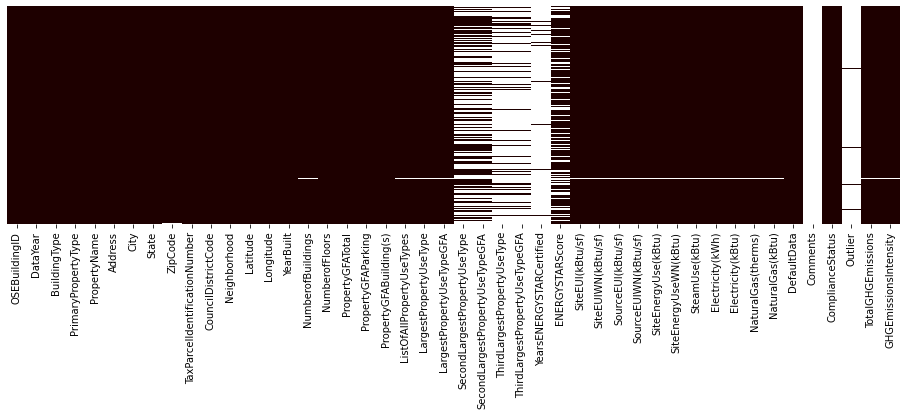

In [19]:
plt.rcParams["figure.figsize"] = (16,4)
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap='pink')

# Elimination des bâtiments residentiels
    

Notre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.
Nous allons eliminer les bâtiments residentiels


In [20]:
building_type = data['BuildingType'].value_counts().head(400).to_frame()
b = building_type.style.background_gradient(cmap='Reds')
b


- SPS = Seattle Public Schools
- Multifamily residential (also known as multidwelling unit or MDU) is a classification of housing where multiple separate housing units for residential inhabitants are contained within one building or several buildings within one complex.


In [21]:
elimine_residentiel = ~(data['BuildingType'].str.contains('multifamily', case=False))


In [22]:
print(f'Nous allons enlever {data[~(elimine_residentiel)].shape[0]} lignes (batiments destinés à habitation)')

Nous allons enlever 1708 lignes (batiments destinés à habitation)


In [23]:
data = data[elimine_residentiel]


In [24]:
data.shape


(1668, 46)

# Suppression des colonnes qui ne sont pas pertinentes

In [25]:
colonnes_pas_pertinentes = ['TaxParcelIdentificationNumber',
                            'YearsENERGYSTARCertified',
                            'DefaultData',
                            'Comments',
                            'Outlier',
                            'City',
                            'State',
                           ]

In [26]:
cond_DefaultData = ~(data['DefaultData'].isna())

data[cond_DefaultData][['DefaultData']].sample(10)


DefaultData
1267        False
2623        False
2699        False
1195        False
3240        False
1923        False
61          False
11          False
569         False
3193        False

In [27]:
data['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [28]:
data['Outlier'].value_counts()

Low outlier     15
High outlier     2
Name: Outlier, dtype: int64

In [29]:
data[(data['Outlier'] == 'Low outlier')]

OSEBuildingID  DataYear        BuildingType  \
384             539      2016      NonResidential   
448             608      2016      NonResidential   
839           19967      2016   SPS-District K-12   
1045          20617      2016      NonResidential   
1229          21315      2016      NonResidential   
1295          21474      2016      NonResidential   
1611          22830      2016      NonResidential   
1945          23912      2016      NonResidential   
2129          24547      2016      NonResidential   
2189          24717      2016      NonResidential   
2216          24825      2016      NonResidential   
2410          25553      2016      NonResidential   
2450          25674      2016      NonResidential   
2801          27007      2016      NonResidential   
3152          43948      2016  Nonresidential COS   

              PrimaryPropertyType                    PropertyName  \
384                  Retail Store               University Center   
448                  Large Office          411 1ST AVE  S (ID608)   
839                   K-12 School                  Queen Anne Gym   
1045                 Retail Store           Seattle Habitat Store   
1229  Small- and Mid-Sized Office                 1518 Fifith Ave   
1295                        Other                  The Lusty Lady   
1611             Worship Facility                  Freedom Church   
1945  Small- and Mid-Sized Office                  1416 S Jackson   
2129                  K-12 School       Islamic School of Seattle   
2189                        Other        1701 First Ave South LLC   
2216  Small- and Mid-Sized Office                   2233 Building   
2410                        Hotel  J & M HOTEL BUILDING (ID25553)   
2450         Low-Rise Multifamily          (ID25674) COMET TAVERN   
2801             Worship Facility        Seattle Community Church   
3152                        Other           Georgetown Steamplant   

                        Address     City State  ZipCode  \
384       4501 Roosevelt Way NE  Seattle    WA  98105.0   
448               411 1ST AVE S  Seattle    WA  98104.0   
839              1431 2nd Ave N  Seattle    WA  98109.0   
1045             21 S Nevada St  Seattle    WA  98134.0   
1229             1520 Fifth Ave  Seattle    WA  98101.0   
1295               1315 1st Ave  Seattle    WA  98101.0   
1611              9601 35th Ave  Seattle    WA  98126.0   
1945  1416 South Jackson Street  Seattle    WA  98133.0   
2129               720 25TH AVE  Seattle    WA  98122.0   
2189       1701 First Ave South  Seattle    WA  98134.0   
2216         2233 1st AVE.South  Seattle    WA  98104.0   
2410              210 1St Ave S  Seattle    WA  98104.0   
2450              916 E PIKE ST  Seattle    WA  98122.0   
2801        4501 46th Avenue NE  Seattle    WA  98105.0   
3152     6605 13th Avenue South  Seattle    WA  98108.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
384                     5335200380                    4   
448                     5247800200                    2   
839                     0811000005                    7   
1045                    1824049074                    2   
1229                    1975700135                    7   
1295                    1976200060                    7   
1611                    2858600090                    1   
1945                    3320000165                    3   
2129                    6840700175                    3   
2189                    7666207085                    2   
2216                    7666207190                    2   
2410                    5247800130                    7   
2450                    6003500480                    3   
2801                    5364200005                    4   
3152                    0000000000                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
384               NORTHEAST  47.66178 -122.31812       1987   
448                DOWNTOWN  47.5987

In [30]:
state = data['State'].value_counts().head(400).to_frame()
state.style.background_gradient(cmap='OrRd')

In [31]:
city = data['City'].value_counts().head(400).to_frame()
city.style.background_gradient(cmap='OrRd')

In [32]:
data = data.drop(colonnes_pas_pertinentes, axis='columns')

In [33]:
data.shape

(1668, 39)

# Suppression des colonnes fortement corrélés

In [34]:
parametres = data.select_dtypes(include=[np.float64, np.int64]).columns


In [35]:
data_par = data[parametres]

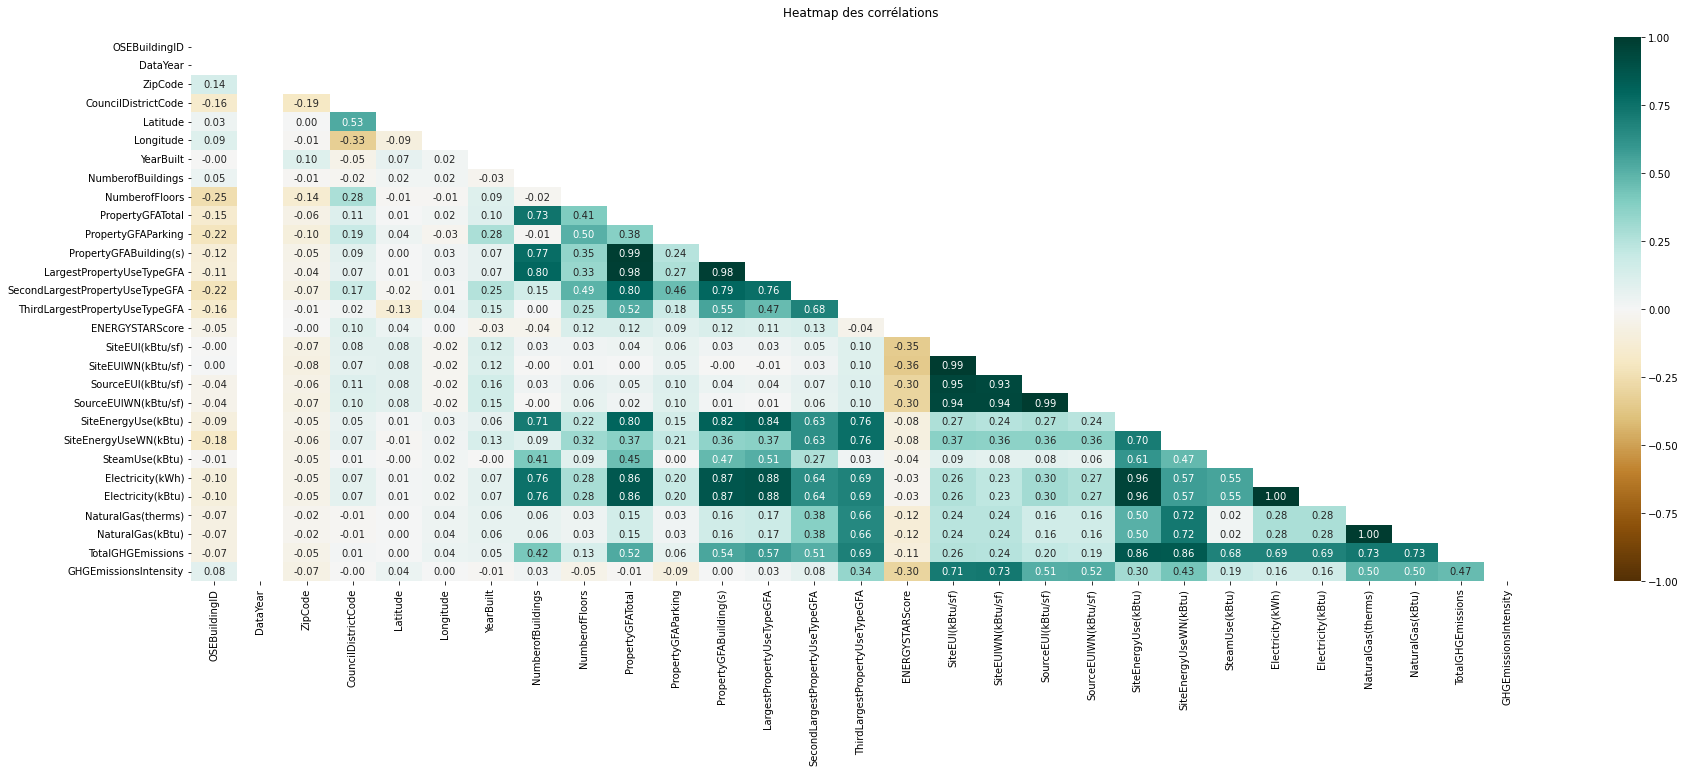

In [36]:
plt.subplots(figsize=(30, 10))
matrix = np.triu(data_par.corr())

ax = sns.heatmap(data_par.corr(),
                 annot=True,
                 mask=matrix,
                 cmap='BrBG',
                 fmt='.2f',
                vmin=-1,
                vmax=1)
ax.set_title(f'Heatmap des corrélations\n')
plt.show()

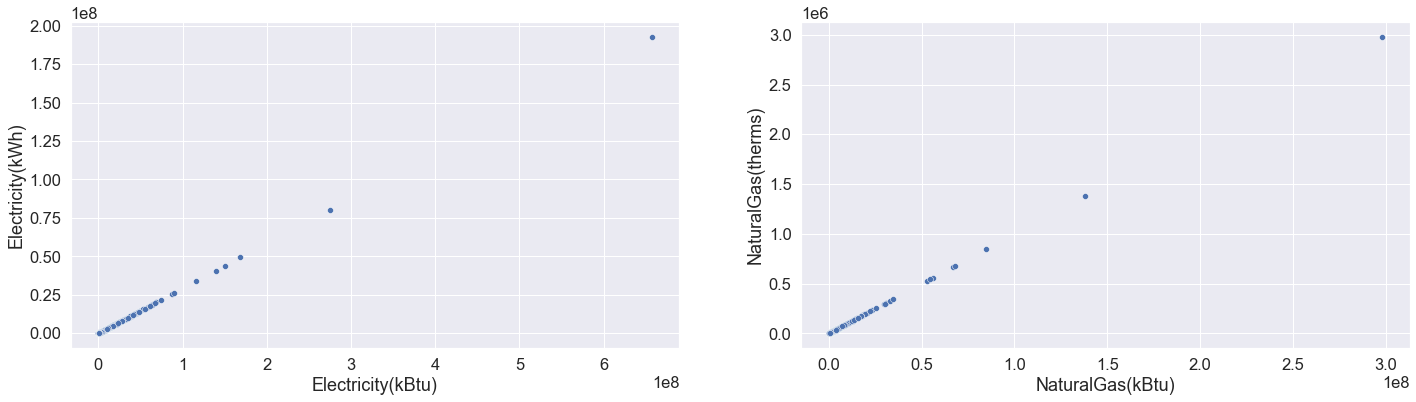

In [37]:
sns.set_theme(style="white", palette=None)
sns.set(rc = {'figure.figsize':(24,6)}, font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(ax=axes[0], data=data, x='Electricity(kBtu)', y='Electricity(kWh)')
sns.scatterplot(ax=axes[1], data=data, x='NaturalGas(kBtu)', y='NaturalGas(therms)')

plt.show()

In [38]:
data = data.drop(['Electricity(kWh)', 'NaturalGas(therms)'], axis=1)

In [39]:
data.shape

(1668, 37)

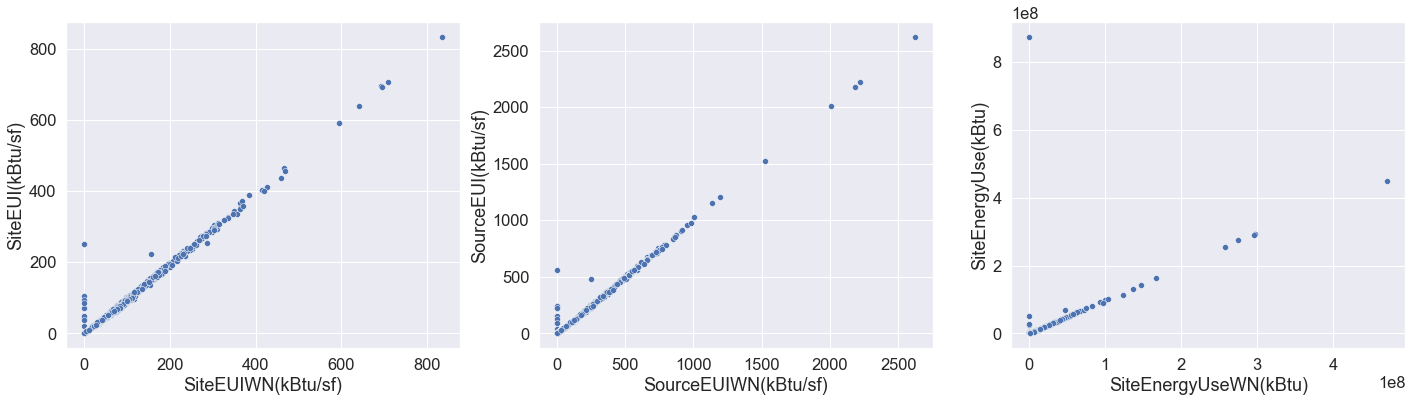

In [40]:
sns.set_theme(style="white", palette=None)
sns.set(rc={'figure.figsize': (24, 6)}, font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=3)

sns.scatterplot(ax=axes[0],
                data=data,
                x='SiteEUIWN(kBtu/sf)',
                y='SiteEUI(kBtu/sf)')
sns.scatterplot(ax=axes[1],
                data=data,
                x='SourceEUIWN(kBtu/sf)',
                y='SourceEUI(kBtu/sf)')
sns.scatterplot(ax=axes[2],
                data=data,
                x='SiteEnergyUseWN(kBtu)',
                y='SiteEnergyUse(kBtu)')

plt.show()

In [41]:
colonnes=['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)']

In [42]:
data = data.drop(colonnes, axis='columns')

In [43]:
data.shape

(1668, 34)

In [44]:
manquant(data)

column_name  nb_manquant  nb_present  \
0       ThirdLargestPropertyUseType         1315         353   
1    ThirdLargestPropertyUseTypeGFA         1315         353   
2      SecondLargestPropertyUseType          813         855   
3   SecondLargestPropertyUseTypeGFA          813         855   
4                   ENERGYSTARScore          574        1094   
5                           ZipCode           16        1652   
6         LargestPropertyUseTypeGFA            6        1662   
7            LargestPropertyUseType            6        1662   
8                  SiteEUI(kBtu/sf)            3        1665   
9         ListOfAllPropertyUseTypes            2        1666   
10              SiteEnergyUse(kBtu)            2        1666   
11                   SteamUse(kBtu)            2        1666   
12                NumberofBuildings            2        1666   
13                Electricity(kBtu)            2        1666   
14                 NaturalGas(kBtu)            2        1666   
15                TotalGHGEmissions            2        1666   
16               SourceEUI(kBtu/sf)            2        1666   
17            GHGEmissionsIntensity            2        1666   
18                 ComplianceStatus            0        1668   
19                    OSEBuildingID            0        1668   
20                 PropertyGFATotal            0        1668   
21                   NumberofFloors            0        1668   
22                        YearBuilt            0        1668   
23                        Longitude            0        1668   
24                         Latitude            0        1668   
25                     Neighborhood            0        1668   
26              CouncilDistrictCode            0        1668   
27                          Address            0        1668   
28                     PropertyName            0        1668   
29              PrimaryPropertyType            0        1668   
30                     BuildingType            0        1668   
31                         DataYear            0        1668   
32               PropertyGFAParking            0        1668   
33           PropertyGFABuilding(s)            0        1668   

    Taux de remplissage  
0             21.163070  
1             21.163070  
2             51.258993  
3             51.258993  
4             65.587530  
5             99.040767  
6             99.640288  
7             99.640288  
8             99.820144  
9             99.880096  
10            99.880096  
11            99.880096  
12            99.880096  
13            99.880096  
14            99.880096  
15            99.880096  
16            99.880096  
17            99.880096  
18           100.000000  
19           100.000000  
20           100.000000  
21           100.000000  
22           100.000000  
23           100.000000  
24           100.000000  
25           100.000000  
26           100.000000  
27           100.000000  
28           100.000000  
29           100.000000  
30           100.000000  
31           100.000000  
32           100.000000  
33           100.000000

# Traitement des valeurs manquantes

In [45]:
data.isna().sum().sort_values(ascending=False)


ThirdLargestPropertyUseTypeGFA     1315
ThirdLargestPropertyUseType        1315
SecondLargestPropertyUseTypeGFA     813
SecondLargestPropertyUseType        813
ENERGYSTARScore                     574
ZipCode                              16
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SiteEUI(kBtu/sf)                      3
ListOfAllPropertyUseTypes             2
TotalGHGEmissions                     2
NaturalGas(kBtu)                      2
Electricity(kBtu)                     2
SteamUse(kBtu)                        2
SiteEnergyUse(kBtu)                   2
SourceEUI(kBtu/sf)                    2
GHGEmissionsIntensity                 2
NumberofBuildings                     2
DataYear                              0
Neighborhood                          0
BuildingType                          0
ComplianceStatus                      0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0


In [46]:
data.select_dtypes(['object']).nunique().sort_values()


ComplianceStatus                   4
BuildingType                       5
Neighborhood                      19
PrimaryPropertyType               22
ThirdLargestPropertyUseType       39
SecondLargestPropertyUseType      47
LargestPropertyUseType            56
ListOfAllPropertyUseTypes        373
Address                         1647
PropertyName                    1664
dtype: int64

In [47]:
data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']] = data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']].fillna(0, )


In [48]:
data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']] = data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']].fillna('No Use')


In [49]:
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna('No information')


In [50]:
data[data['LargestPropertyUseType'] == 'No information']


OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
353             496      2016  NonResidential        Self-Storage Facility   
578             773      2016  NonResidential  Small- and Mid-Sized Office   
1147          21103      2016  NonResidential                        Hotel   
2414          25568      2016  NonResidential  Small- and Mid-Sized Office   
2459          25711      2016  NonResidential                   Restaurant   
2670          26532      2016  NonResidential           Mixed Use Property   

                          PropertyName                 Address  ZipCode  \
353                   Market St Center   2811 NW Market Street  98107.0   
578                   SEATTLE BUILDING         215 COLUMBIA ST  98104.0   
1147                   Palladian Hotel      2000 Second Avenue  98121.0   
2414               Talon Northlake LLC    1341 N Northlake Way  98103.0   
2459  BUSH GARDEN - RESTURANT & LOUNGE     614 S MAYNARD AVE S  98104.0   
2670                  KALBERG BUILDING  4515 UNIVERSITY WAY NE  98105.0   

      CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
353                     6      BALLARD  47.66838 -122.39310       1946   
578                     7     DOWNTOWN  47.60380 -122.33293       1924   
1147                    7     DOWNTOWN  47.61203 -122.34165       1910   
2414                    4   LAKE UNION  47.64747 -122.34086       2008   
2459                    2     DOWNTOWN  47.59697 -122.32474       1913   
2670                    4    NORTHEAST  47.66182 -122.31345       1928   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
353                 2.0               2            111445                   0   
578                 NaN               4             63150                   0   
1147                1.0               8             61721                   0   
2414                1.0               4             48350                   0   
2459                1.0               3             28800                   0   
2670                NaN               2             20760                   0   

      PropertyGFABuilding(s)  \
353                   111445   
578                    63150   
1147                   61721   
2414                   48350   
2459                   28800   
2670                   20760   

                              ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
578                                                 NaN   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   
2670                                                NaN   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353          No information                        NaN   
578          No information                        NaN   
1147         No information                        NaN   
2414         No information                        NaN   
2459         No information                        NaN   
2670         No information                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
353                        No Use                              0.0   
578                        No Use                              0.0   
1147                       No Use                              0.0   
2414                       No Use                              0.0   
2459                       No Use                              0.0   
2670                       No Use                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
353                       No Use                             0.0   
578                       No Use                             0.0   
1147                      No Use                             0.0   
2414                      No Use     

In [51]:
data.isna().sum().sort_values()


OSEBuildingID                        0
ComplianceStatus                     0
ThirdLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA      0
SecondLargestPropertyUseType         0
LargestPropertyUseType               0
PropertyGFAParking                   0
PropertyGFATotal                     0
NumberofFloors                       0
YearBuilt                            0
PropertyGFABuilding(s)               0
PrimaryPropertyType                  0
Latitude                             0
Neighborhood                         0
CouncilDistrictCode                  0
DataYear                             0
Address                              0
PropertyName                         0
Longitude                            0
BuildingType                         0
NaturalGas(kBtu)                     2
Electricity(kBtu)                    2
SteamUse(kBtu)                       2
SiteEnergyUse(kBtu)                  2
SourceEUI(kBtu/sf)       

In [52]:
data.dropna(how = 'all', axis=0, inplace=True)


In [53]:
data.isna().sum().sort_values()


OSEBuildingID                        0
ComplianceStatus                     0
ThirdLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA      0
SecondLargestPropertyUseType         0
LargestPropertyUseType               0
PropertyGFAParking                   0
PropertyGFATotal                     0
NumberofFloors                       0
YearBuilt                            0
PropertyGFABuilding(s)               0
PrimaryPropertyType                  0
Latitude                             0
Neighborhood                         0
CouncilDistrictCode                  0
DataYear                             0
Address                              0
PropertyName                         0
Longitude                            0
BuildingType                         0
NaturalGas(kBtu)                     2
Electricity(kBtu)                    2
SteamUse(kBtu)                       2
SiteEnergyUse(kBtu)                  2
SourceEUI(kBtu/sf)       

In [54]:
data.drop(['ENERGYSTARScore'], axis=1)[data.drop(['ENERGYSTARScore'],axis=1).isna().any(axis=1)].shape


(23, 33)

In [55]:
index_to_drop = data.drop([ 'ENERGYSTARScore'], axis=1)[data.drop([ 'ENERGYSTARScore'],axis=1).isna().any(axis=1)].index


In [56]:
data.drop(index_to_drop, axis=0, inplace=True)


In [57]:
data.shape


(1645, 34)

In [58]:
manquant(data)

column_name  nb_manquant  nb_present  \
0                   ENERGYSTARScore          556        1089   
1                     OSEBuildingID            0        1645   
2                  ComplianceStatus            0        1645   
3                  NaturalGas(kBtu)            0        1645   
4                 Electricity(kBtu)            0        1645   
5                    SteamUse(kBtu)            0        1645   
6               SiteEnergyUse(kBtu)            0        1645   
7                SourceEUI(kBtu/sf)            0        1645   
8                  SiteEUI(kBtu/sf)            0        1645   
9    ThirdLargestPropertyUseTypeGFA            0        1645   
10      ThirdLargestPropertyUseType            0        1645   
11  SecondLargestPropertyUseTypeGFA            0        1645   
12     SecondLargestPropertyUseType            0        1645   
13        LargestPropertyUseTypeGFA            0        1645   
14           LargestPropertyUseType            0        1645   
15        ListOfAllPropertyUseTypes            0        1645   
16           PropertyGFABuilding(s)            0        1645   
17               PropertyGFAParking            0        1645   
18                         DataYear            0        1645   
19                     BuildingType            0        1645   
20              PrimaryPropertyType            0        1645   
21                     PropertyName            0        1645   
22                          Address            0        1645   
23                          ZipCode            0        1645   
24                TotalGHGEmissions            0        1645   
25              CouncilDistrictCode            0        1645   
26                         Latitude            0        1645   
27                        Longitude            0        1645   
28                        YearBuilt            0        1645   
29                NumberofBuildings            0        1645   
30                   NumberofFloors            0        1645   
31                 PropertyGFATotal            0        1645   
32                     Neighborhood            0        1645   
33            GHGEmissionsIntensity            0        1645   

    Taux de remplissage  
0             66.200608  
1            100.000000  
2            100.000000  
3            100.000000  
4            100.000000  
5            100.000000  
6            100.000000  
7            100.000000  
8            100.000000  
9            100.000000  
10           100.000000  
11           100.000000  
12           100.000000  
13           100.000000  
14           100.000000  
15           100.000000  
16           100.000000  
17           100.000000  
18           100.000000  
19           100.000000  
20           100.000000  
21           100.000000  
22           100.000000  
23           100.000000  
24           100.000000  
25           100.000000  
26           100.000000  
27           100.000000  
28           100.000000  
29           100.000000  
30           100.000000  
31           100.000000  
32           100.000000  
33           100.000000

In [59]:
from sklearn.impute import SimpleImputer
data_copy = data.select_dtypes(include='float64').copy()
simple_imputer =  SimpleImputer(strategy='mean')
imputed_data = pd.DataFrame(simple_imputer.fit_transform(data_copy), columns=data_copy.columns, index=data.index)
imputed_cols = imputed_data.columns
for col in imputed_cols:
    data[col] = imputed_data[col].copy()

In [60]:
manquant(data)

column_name  nb_manquant  nb_present  \
0                     OSEBuildingID            0        1645   
1                  ComplianceStatus            0        1645   
2                  NaturalGas(kBtu)            0        1645   
3                 Electricity(kBtu)            0        1645   
4                    SteamUse(kBtu)            0        1645   
5               SiteEnergyUse(kBtu)            0        1645   
6                SourceEUI(kBtu/sf)            0        1645   
7                  SiteEUI(kBtu/sf)            0        1645   
8                   ENERGYSTARScore            0        1645   
9    ThirdLargestPropertyUseTypeGFA            0        1645   
10      ThirdLargestPropertyUseType            0        1645   
11  SecondLargestPropertyUseTypeGFA            0        1645   
12     SecondLargestPropertyUseType            0        1645   
13        LargestPropertyUseTypeGFA            0        1645   
14           LargestPropertyUseType            0        1645   
15        ListOfAllPropertyUseTypes            0        1645   
16           PropertyGFABuilding(s)            0        1645   
17               PropertyGFAParking            0        1645   
18                         DataYear            0        1645   
19                     BuildingType            0        1645   
20              PrimaryPropertyType            0        1645   
21                     PropertyName            0        1645   
22                          Address            0        1645   
23                          ZipCode            0        1645   
24                TotalGHGEmissions            0        1645   
25              CouncilDistrictCode            0        1645   
26                         Latitude            0        1645   
27                        Longitude            0        1645   
28                        YearBuilt            0        1645   
29                NumberofBuildings            0        1645   
30                   NumberofFloors            0        1645   
31                 PropertyGFATotal            0        1645   
32                     Neighborhood            0        1645   
33            GHGEmissionsIntensity            0        1645   

    Taux de remplissage  
0                 100.0  
1                 100.0  
2                 100.0  
3                 100.0  
4                 100.0  
5                 100.0  
6                 100.0  
7                 100.0  
8                 100.0  
9                 100.0  
10                100.0  
11                100.0  
12                100.0  
13                100.0  
14                100.0  
15                100.0  
16                100.0  
17                100.0  
18                100.0  
19                100.0  
20                100.0  
21                100.0  
22                100.0  
23                100.0  
24                100.0  
25                100.0  
26                100.0  
27                100.0  
28                100.0  
29                100.0  
30                100.0  
31                100.0  
32                100.0  
33                100.0

In [61]:
data[['LargestPropertyUseTypeGFA', 'LargestPropertyUseType']].head()


LargestPropertyUseTypeGFA LargestPropertyUseType
0                    88434.0                  Hotel
1                    83880.0                  Hotel
2                   756493.0                  Hotel
3                    61320.0                  Hotel
4                   123445.0                  Hotel

In [62]:
data.reset_index(drop=True)
print('Notre jeu des données aprés nettoyage et imputation compte {} colonnes et {} lignes.'.format(data.shape[1], data.shape[0]))

Notre jeu des données aprés nettoyage et imputation compte 34 colonnes et 1645 lignes.


In [63]:
data.shape

(1645, 34)

# Analyse Exploratoire

Nous allons à present effectuer une analyse exploratoire sur les indicateurs. Nous commençons par les deux variable à predire. Ce sont:

- SiteEnergyUse(kBtu)
- TotalGHGEmissions

## TotalGHGEmissions & SiteEnergyUse(kBtu)

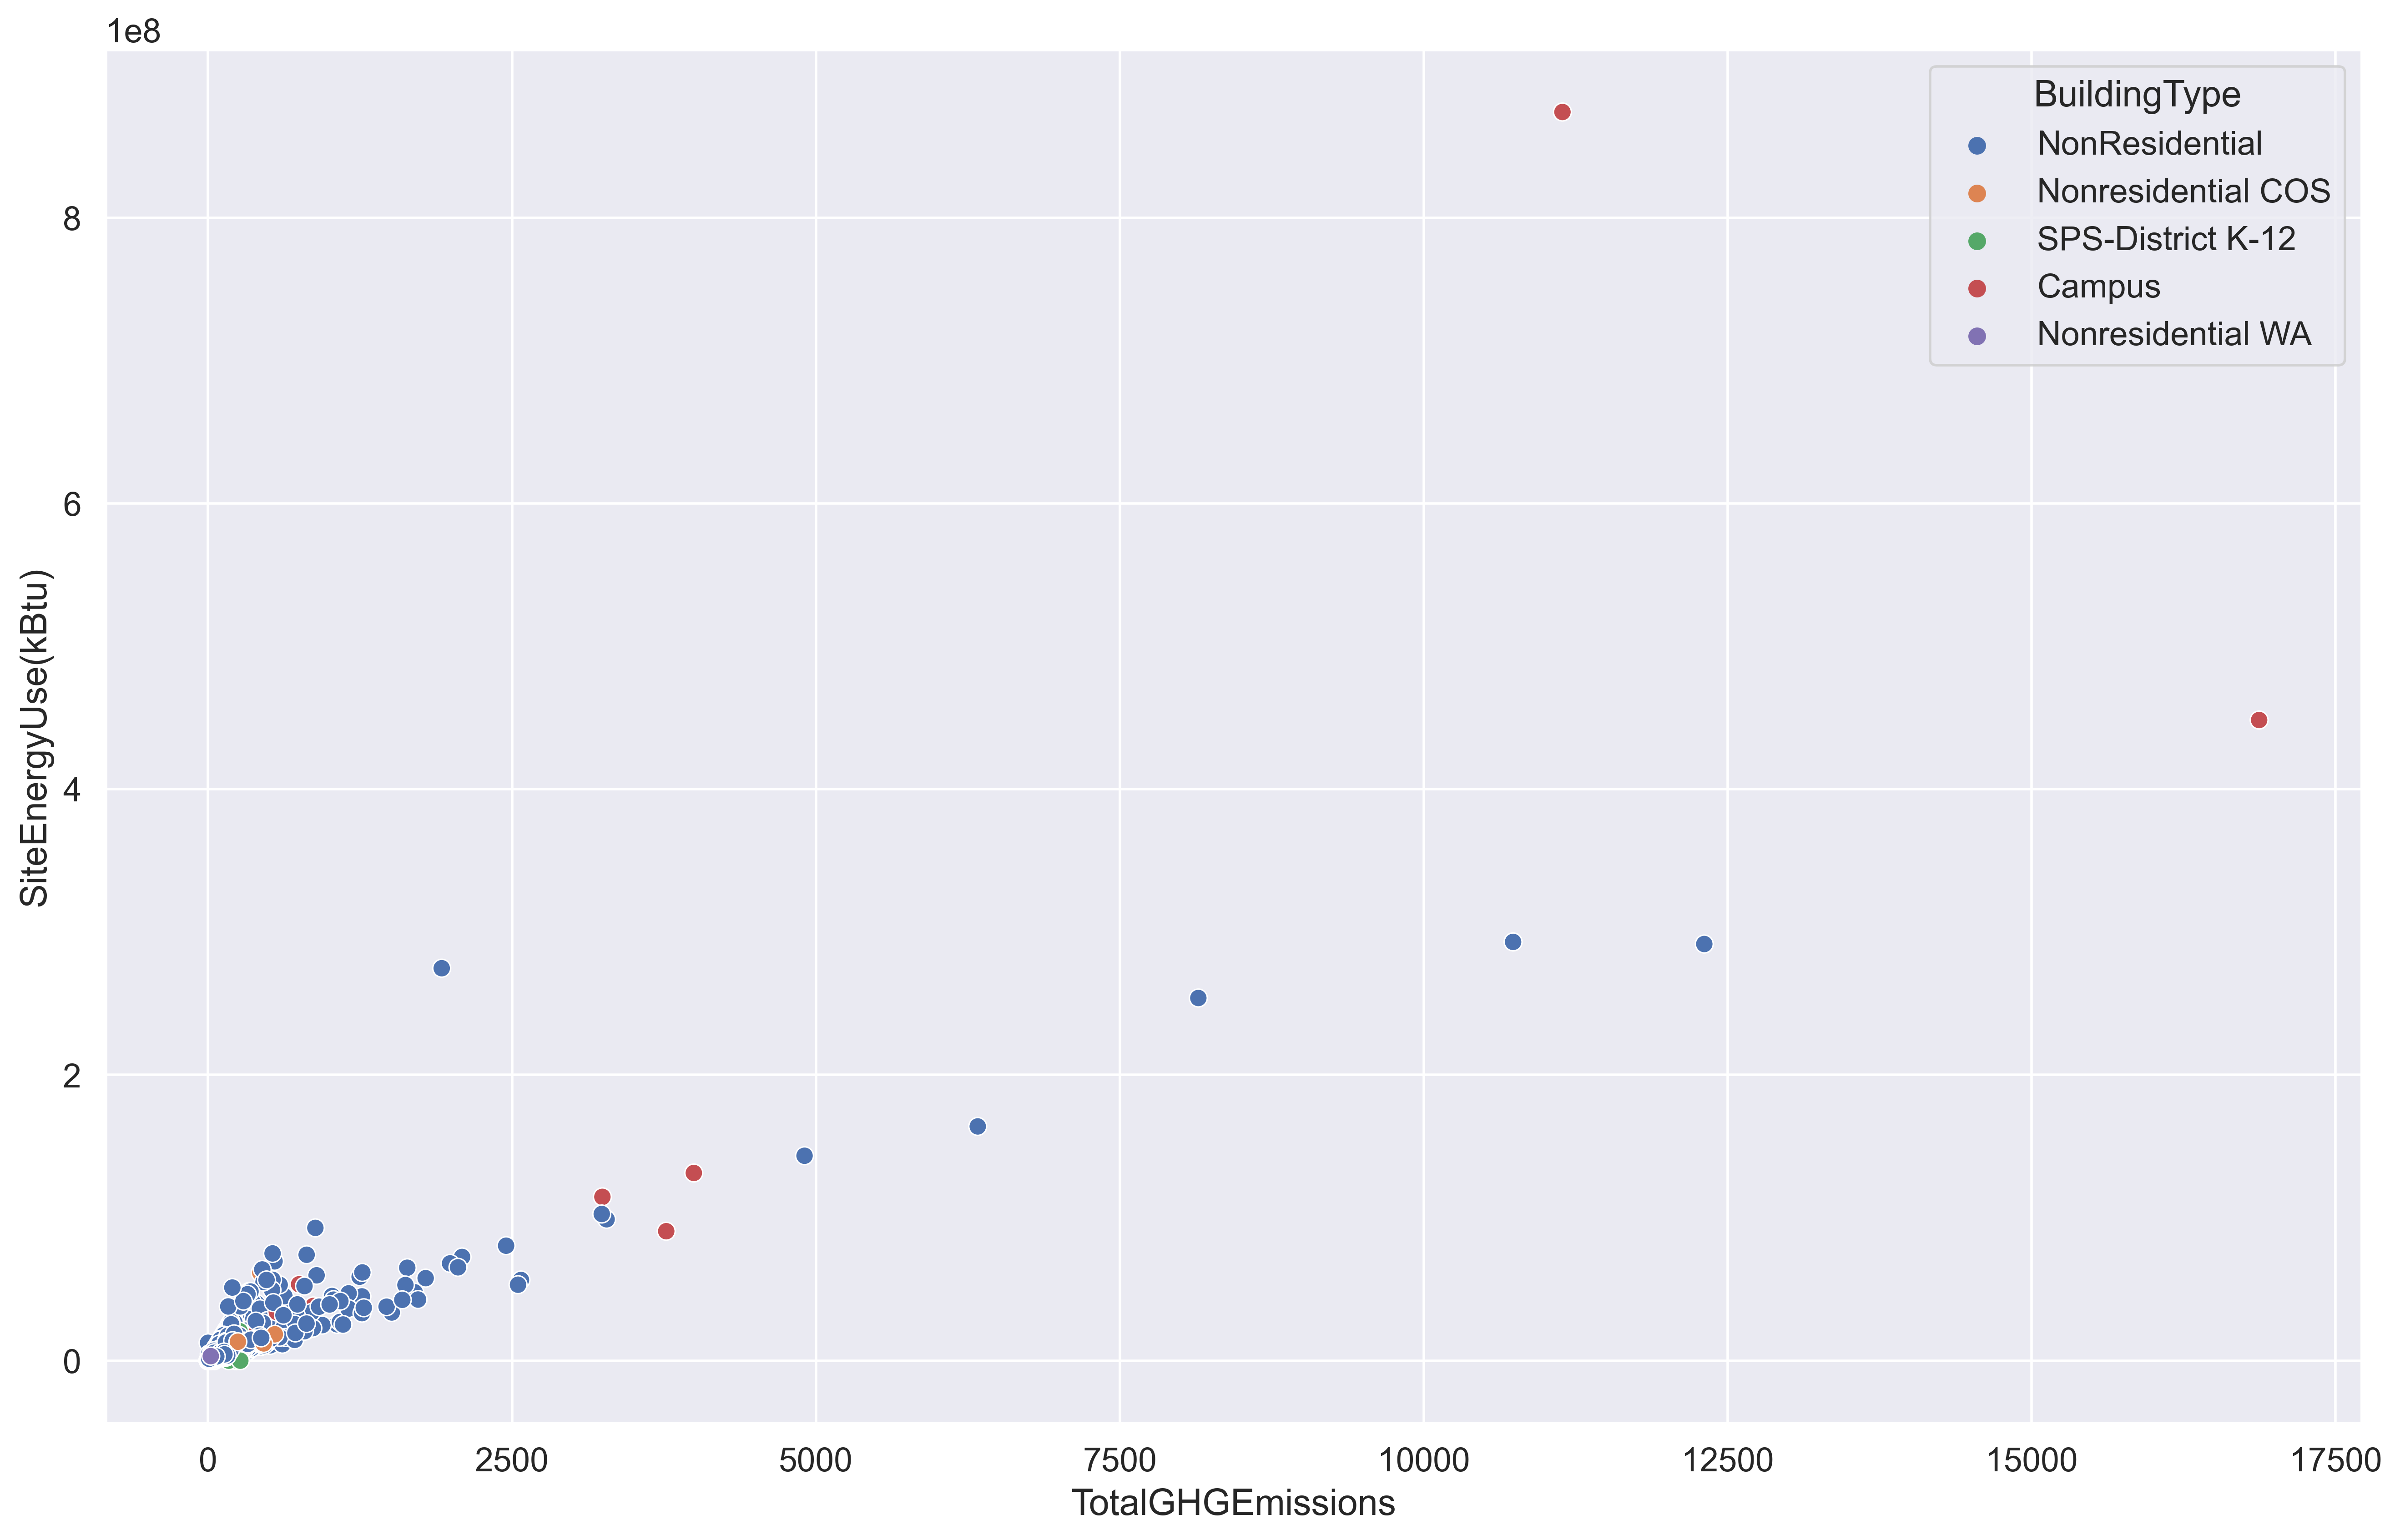

In [64]:
plt.figure(figsize=(16, 10), dpi=400)
sns.set(font_scale=1.2)
ax = sns.scatterplot(y='SiteEnergyUse(kBtu)',
                     x='TotalGHGEmissions',
                     data=data,
                     s=50,
                     hue='BuildingType')
    
plt.show()


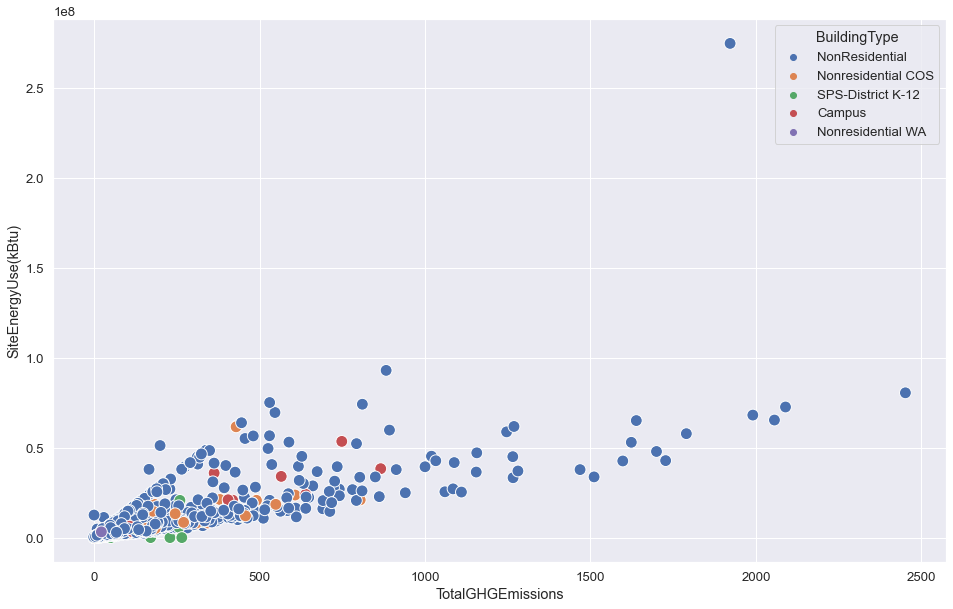

In [65]:
plt.figure(figsize=(16, 10))
sns.scatterplot(y='SiteEnergyUse(kBtu)',
                x='TotalGHGEmissions',
                data=data[data['TotalGHGEmissions'] < 2500],
                s=140,
                hue='BuildingType')
plt.show()

In [66]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'ZipCode', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


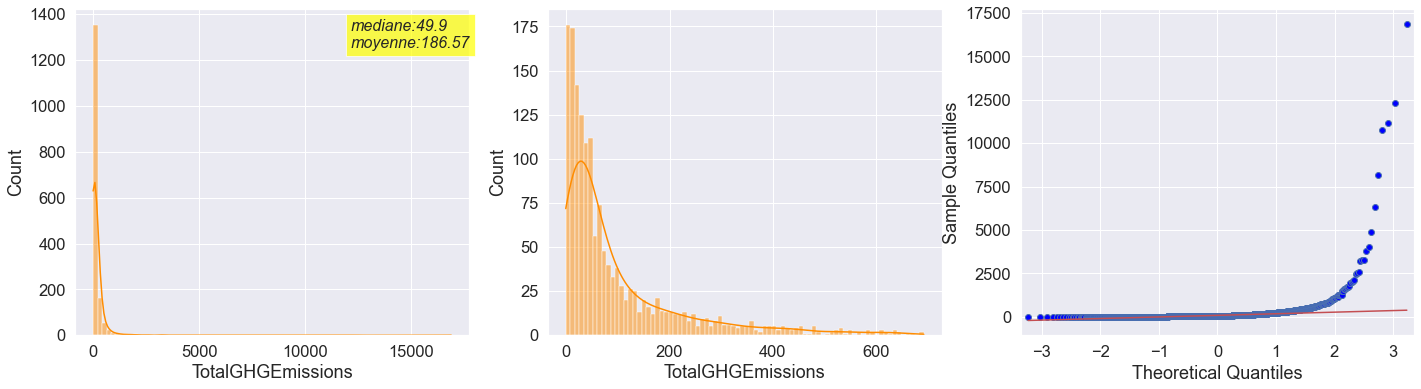

In [67]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab as py

sns.set(
    rc={'figure.figsize': (24, 6)},
    font_scale=1.5,
)
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False)

ax = sns.histplot(data=data,
             x='TotalGHGEmissions',
             kde=True,
             ax=axes[0],
             bins=80,
             color="darkorange")
ax.text(0.7, 0.88, 'mediane:{:.3}\nmoyenne:{}'.format(data['TotalGHGEmissions'].median(), round(data['TotalGHGEmissions'].mean(),2)), style='italic', transform=ax.transAxes, fontsize = 16,
            bbox={'facecolor':'yellow', 'alpha':0.7, 'pad':5})
sns.histplot(data=data[(data['TotalGHGEmissions'] < 700)],
             x='TotalGHGEmissions',
             ax=axes[1],
             bins=80,
             kde=True,
             color="darkorange")
sm.qqplot(data['TotalGHGEmissions'], ax=axes[2], line="q")

py.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


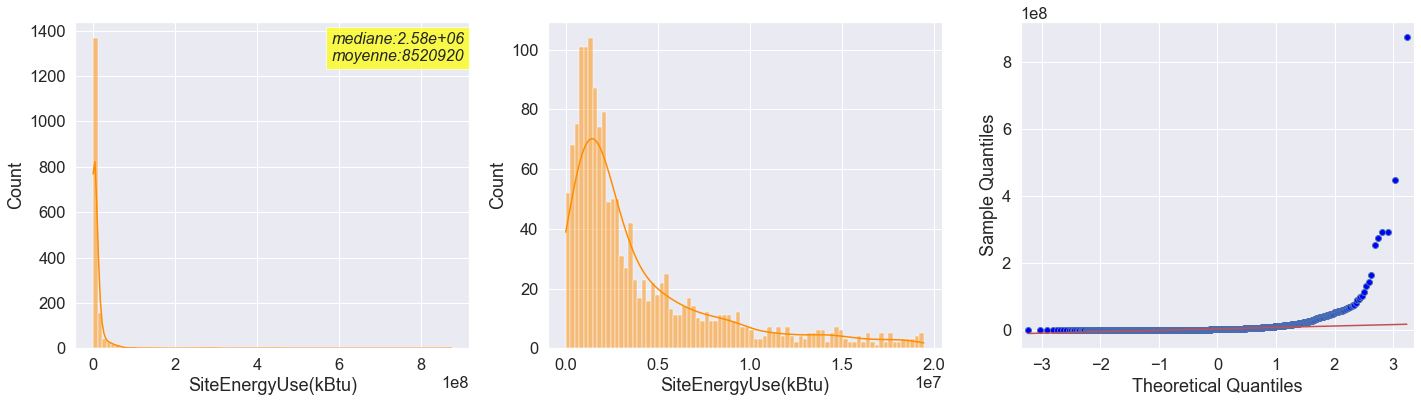

In [68]:
sns.set(rc={'figure.figsize': (24, 6)}, font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False)

ax = sns.histplot(data=data,
             x='SiteEnergyUse(kBtu)',
             ax=axes[0],
             bins=80,
             kde=True,
             color="darkorange")
ax.text(0.65, 0.88, 'mediane:{:.3}\nmoyenne:{}'.format((data['SiteEnergyUse(kBtu)'].median()), round(data['SiteEnergyUse(kBtu)'].mean())), style='italic', transform=ax.transAxes, fontsize = 16,
            bbox={'facecolor':'yellow', 'alpha':0.7, 'pad':5})
sns.histplot(data=data[(data['SiteEnergyUse(kBtu)'] < 20000000)],
             x='SiteEnergyUse(kBtu)',
             ax=axes[1],
             bins=80,
             kde=True,
             color="darkorange")
sm.qqplot(data['SiteEnergyUse(kBtu)'], ax=axes[2], line="q")

py.show()

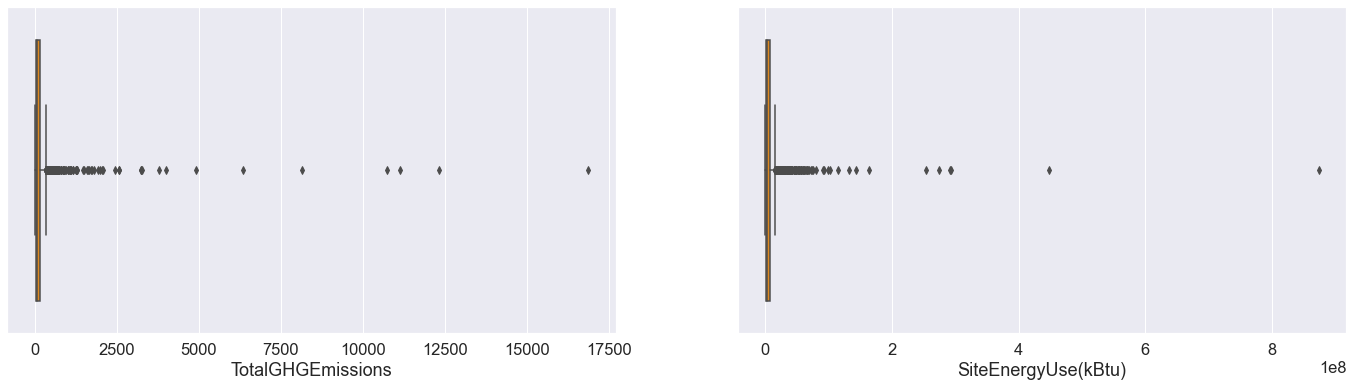

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)

sns.boxplot(data=data, x='TotalGHGEmissions', ax=axes[0], color="darkorange")

sns.boxplot(data=data, x='SiteEnergyUse(kBtu)', ax=axes[1], color="darkorange")

plt.show()

In [70]:
from scipy.stats import normaltest
from scipy.stats import shapiro

# normality test (normaltest)
stat, p = normaltest(data['TotalGHGEmissions'])
print('TotalGHGEmissions (normaltest): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

# normality test (shapiro)
stat, p = shapiro(data['TotalGHGEmissions'])
print('TotalGHGEmissions (Shapiro): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

# normality test (normaltest)
stat, p = normaltest(data['SiteEnergyUse(kBtu)'])
print('SiteEnergyUse(kBtu) (normaltest): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

# normality test (shapiro)
stat, p = shapiro(data['SiteEnergyUse(kBtu)'])
print('SiteEnergyUse(kBtu) (Shapiro): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

TotalGHGEmissions (normaltest): 
Statistics=3119.302, p=0.000
Sample does not look Gaussian (reject H0)
TotalGHGEmissions (Shapiro): 
Statistics=0.178, p=0.000
Sample does not look Gaussian (reject H0)
SiteEnergyUse(kBtu) (normaltest): 
Statistics=3506.140, p=0.000
Sample does not look Gaussian (reject H0)
SiteEnergyUse(kBtu) (Shapiro): 
Statistics=0.195, p=0.000
Sample does not look Gaussian (reject H0)


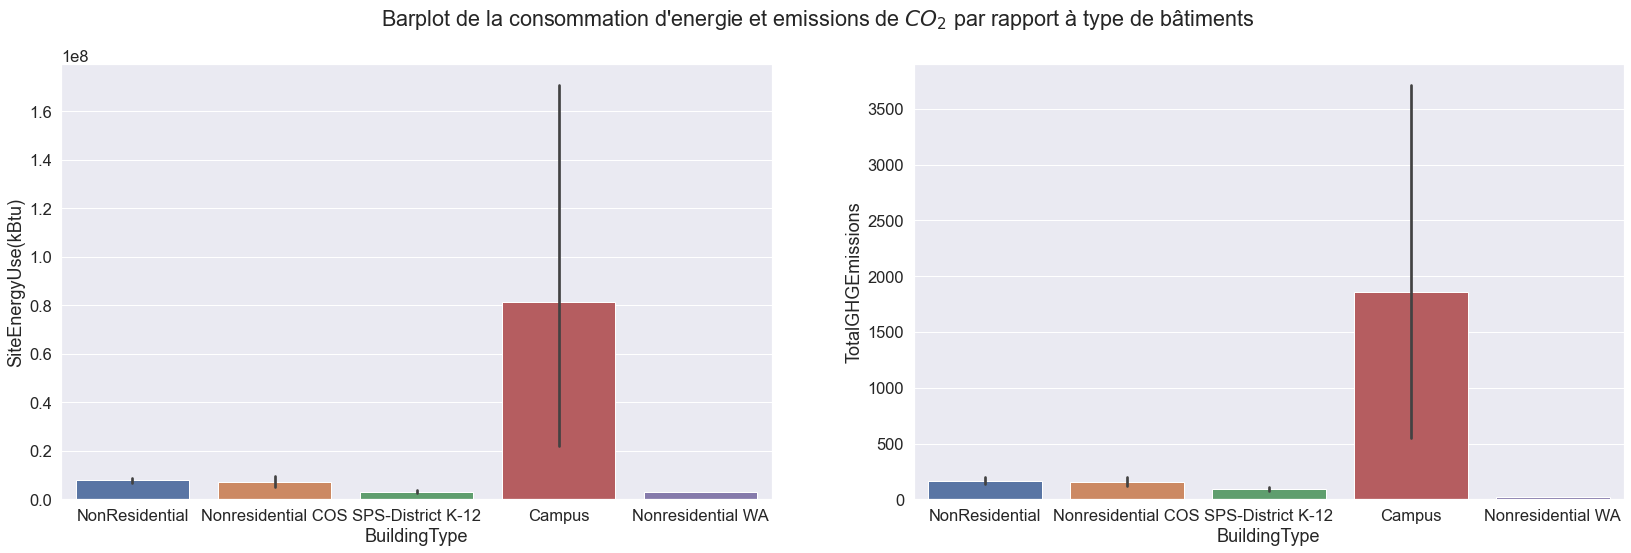

In [71]:
sns.set_theme(style="white", palette=None)
sns.set(rc = {'figure.figsize':(28,8)}, font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.barplot(ax=axes[0], data=data, y='SiteEnergyUse(kBtu)', x='BuildingType')
sns.barplot(ax=axes[1], data=data, y='TotalGHGEmissions', x='BuildingType')
#sns.scatterplot(ax=axes[2], data=data, x='SiteEnergyUseWN(kBtu)', y='SiteEnergyUse(kBtu)')

plt.suptitle("Barplot de la consommation d'energie et emissions de $CO_2$ par rapport à type de bâtiments")
plt.show()

Nous constatons que les campus consomment plus energie que les autre type des bâtiments



In [72]:
from numpy import mean
from numpy import std

# statistiques
data_mean, data_std = mean(data['NumberofBuildings']), std(data['NumberofBuildings'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identifie outliers
outliers = [x for x in data['NumberofBuildings'] if x < lower or x > upper]
print(len(outliers))
print(lower)
print(upper)

6
-7.676920742987641
10.017346274902534


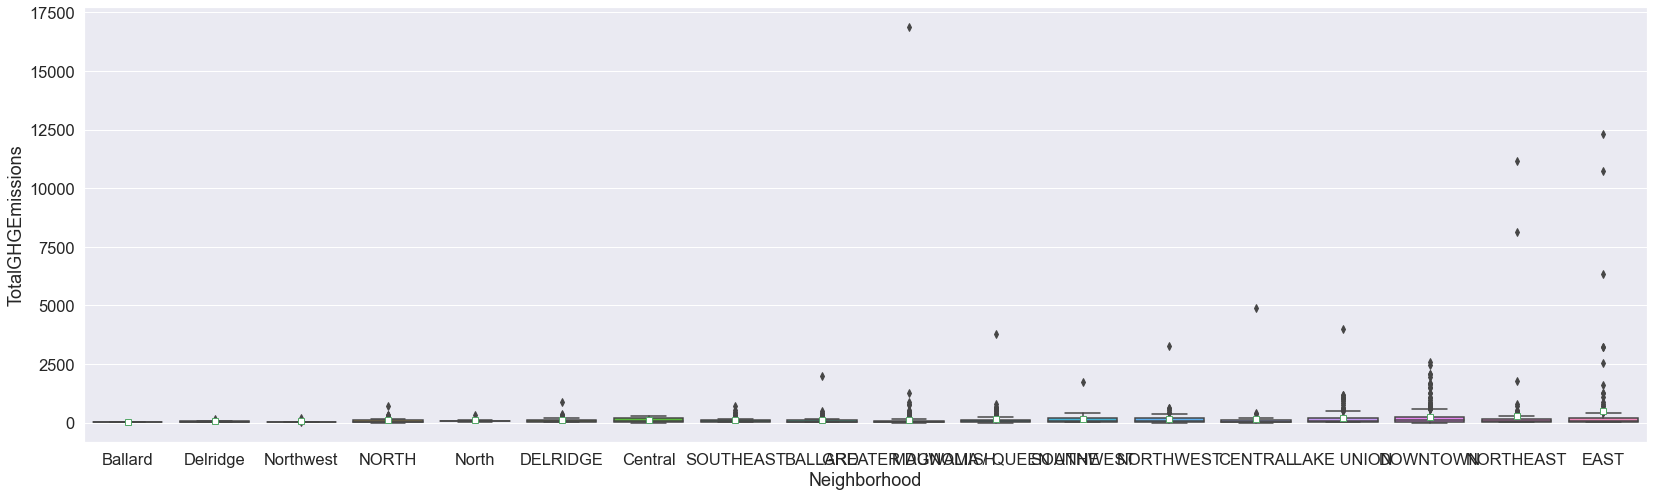

In [73]:
grouped = data.groupby(["Neighborhood"])
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

sns.boxplot(x = data['Neighborhood'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.show()

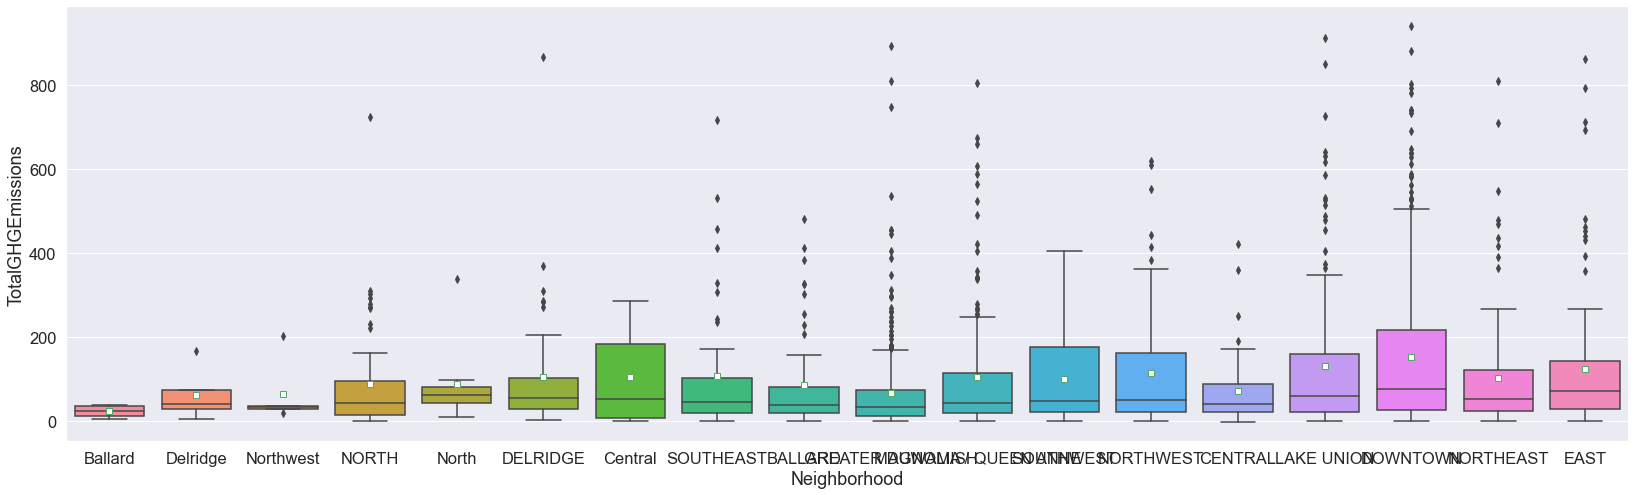

In [74]:
grouped = data.groupby(["Neighborhood"])
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

sns.boxplot(x = data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<1000))]['Neighborhood'],
            y = data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<1000))]['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<1000))],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.show()

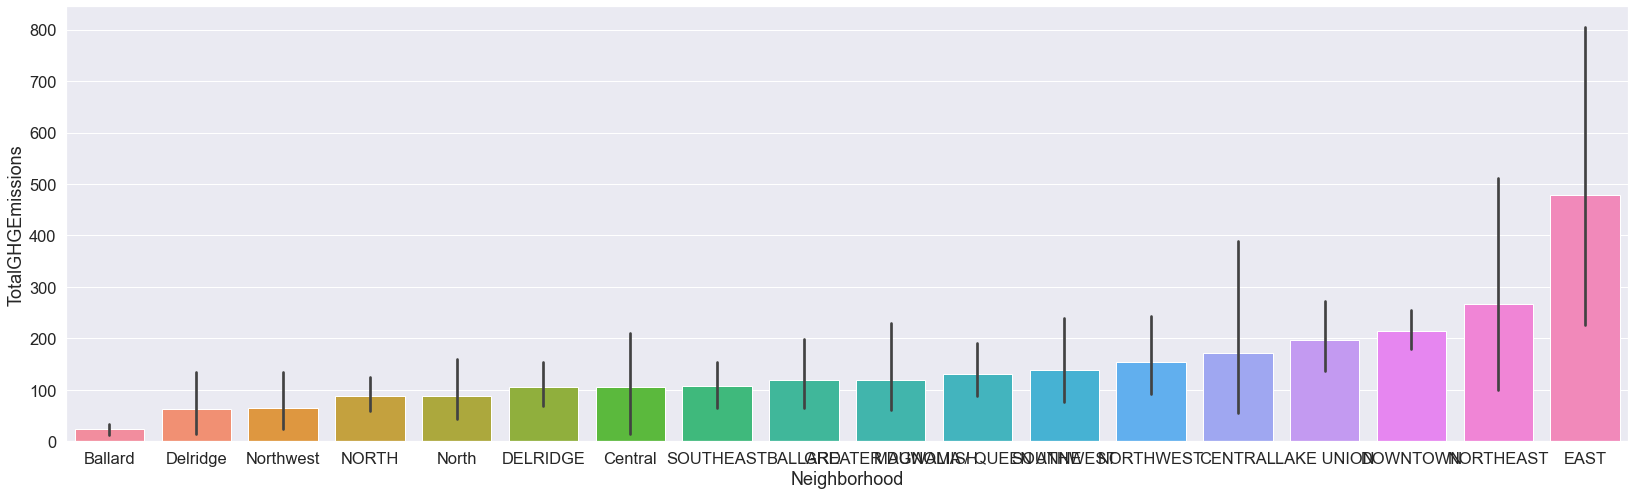

In [75]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

sns.barplot(x = data['Neighborhood'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            saturation=0.9,
            order=order
           )
plt.show()

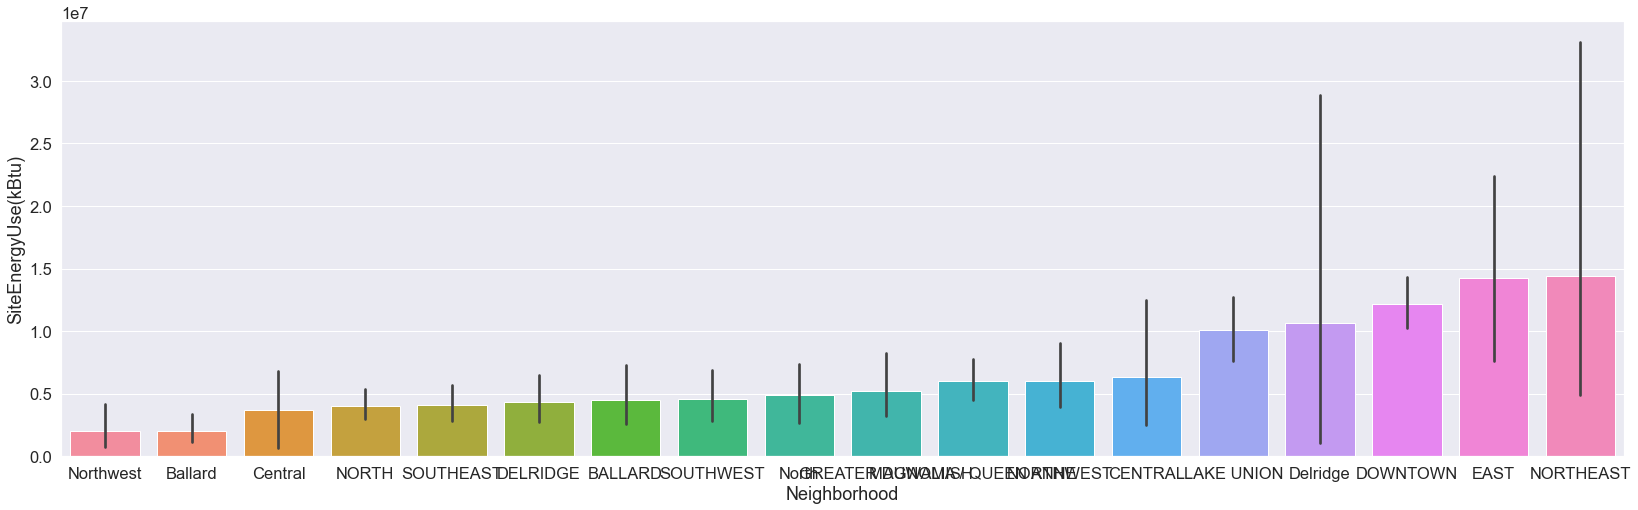

In [76]:
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

sns.barplot(x = data['Neighborhood'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            saturation=0.9,
            order=order)
plt.show()

In [77]:
anova_variete_c = smf.ols('TotalGHGEmissions~BuildingType+PrimaryPropertyType+CouncilDistrictCode+Neighborhood', data=data).fit()
print(anova_variete_c.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     21.83
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          4.33e-127
Time:                        14:30:01   Log-Likelihood:                -12866.
No. Observations:                1645   AIC:                         2.582e+04
Df Residuals:                    1602   BIC:                         2.605e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

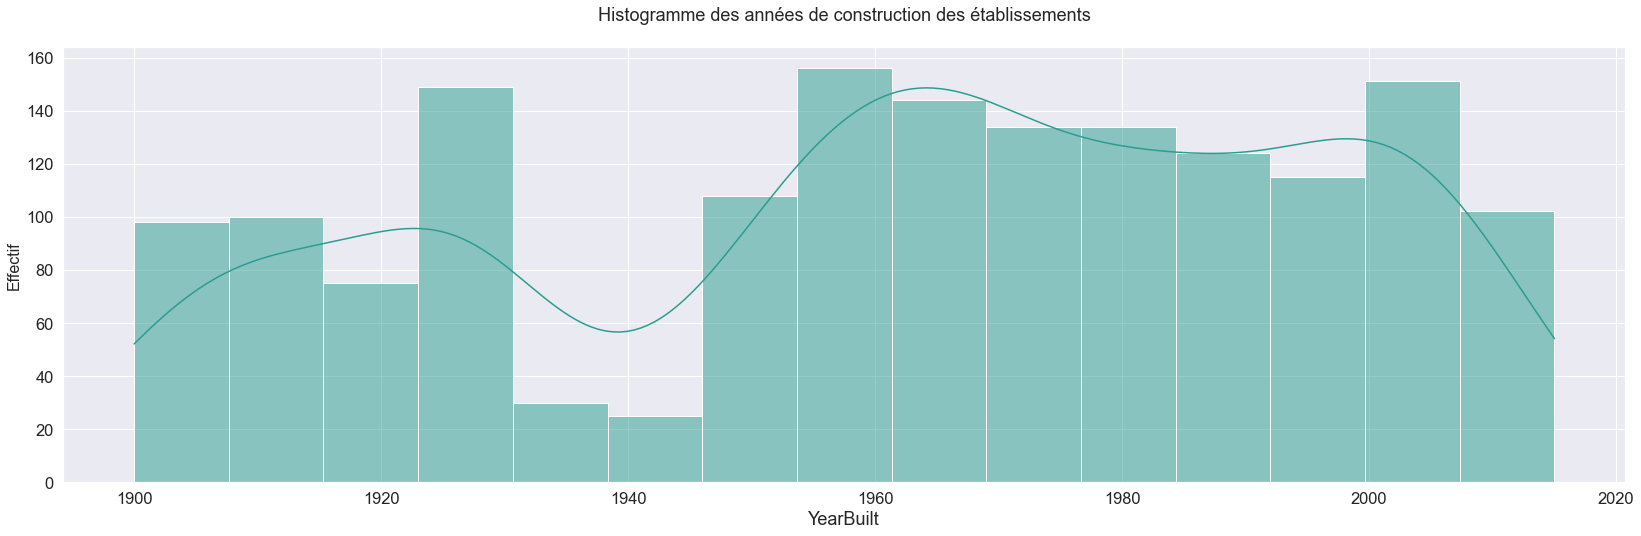

In [78]:
p = sns.histplot(data['YearBuilt'],
                 bins=15,
                 kde=True,
                 color="#2a9d8f",
                 alpha=.5)
p.set_ylabel("Effectif", fontsize=16)
p.set_title("Histogramme des années de construction des établissements\n")
plt.show()

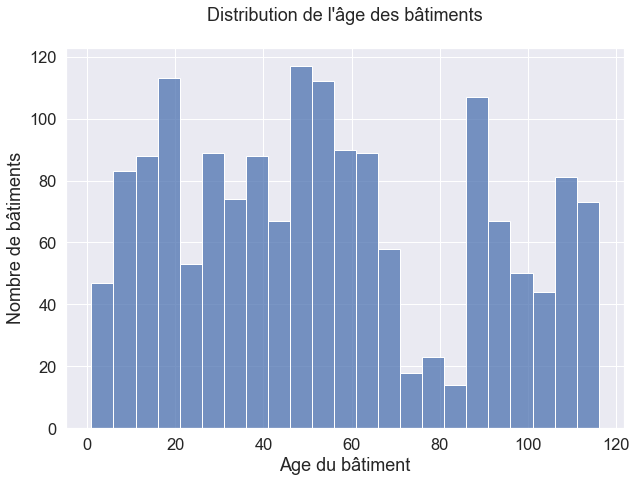

In [79]:
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']

fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=data, x='BuildingAge', bins=int((data.BuildingAge.max() - data.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n")
plt.show()

In [80]:
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']
data["AgeGroup"] = pd.cut(data['BuildingAge'], 5, precision=0, labels=["New","Mid-Aged","Aged","Old",'Very Old'])

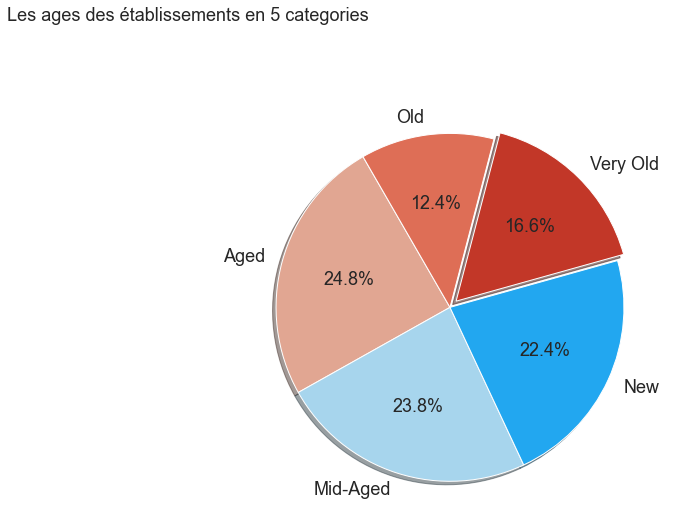

In [81]:
fig = plt.figure(figsize=(30, 20))
fig.text(0,
         1,
         'Les ages des établissements en 5 categories')

couleurs = ({
    "New": '#22a7f0',
    "Mid-Aged": "#a7d5ed",
    "Aged": '#e1a692',
    "Old": '#de6e56',
    'Very Old': '#c23728'
})

data["AgeGroup"].value_counts().plot.pie(
    autopct='%1.1f%%',
    explode=[0, 0, 0, .05, 0],
    colors=[couleurs[v] for v in data["AgeGroup"].value_counts().keys()],
    shadow=True,
    figsize=(12, 8),
    fontsize=18,
    startangle=120)
plt.axis('off')

plt.show()


## Analyse univariée des autres indicateurs



### Distribution des données


In [82]:
indicateurs = [
    'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'SteamUse(kBtu)',
    'Electricity(kBtu)', 'NaturalGas(kBtu)'
]

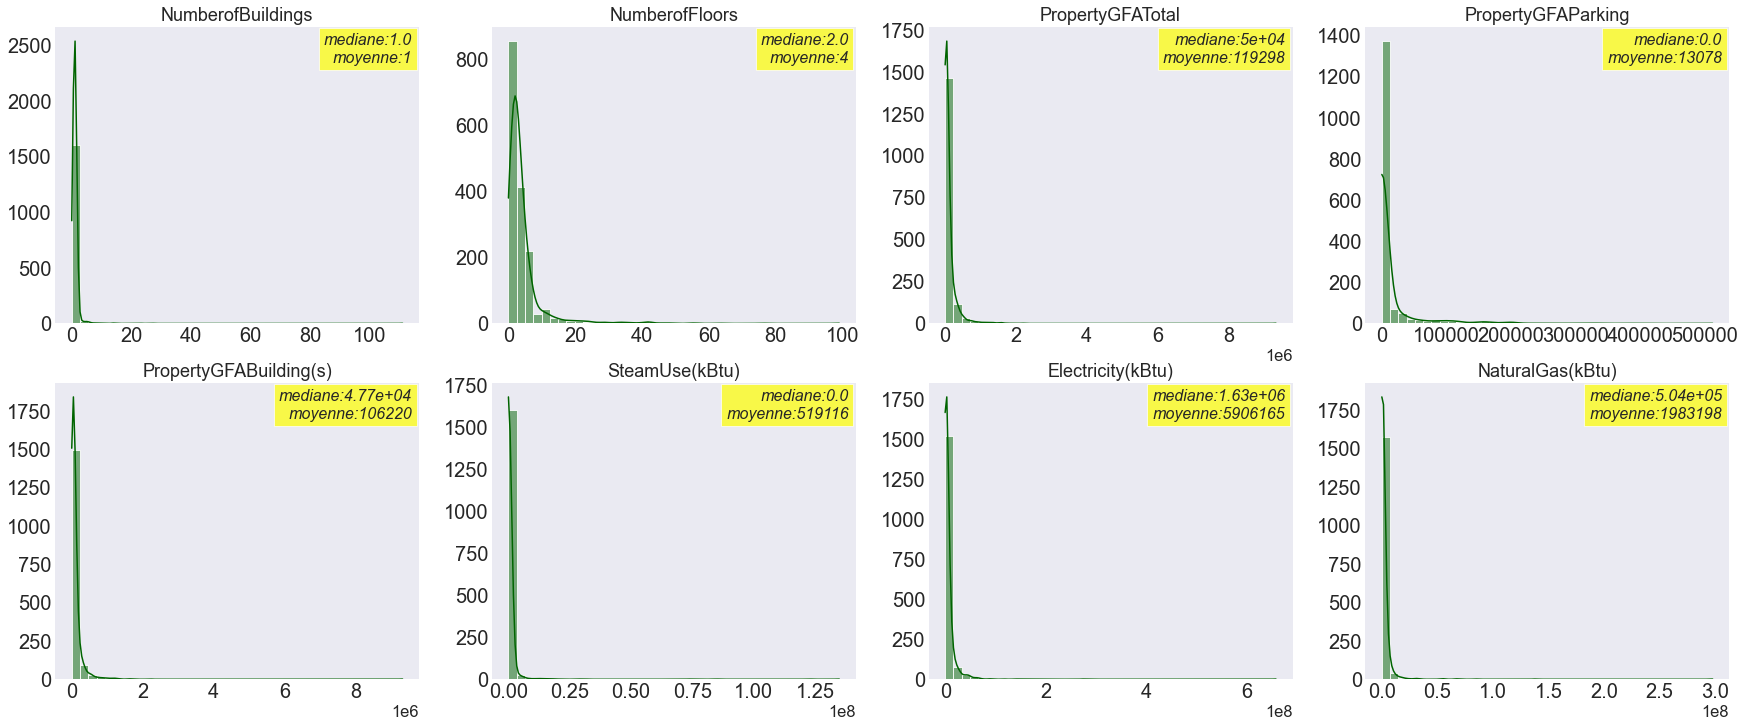

In [83]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-dark")

# Build a rectangle in axes coords
left, width = .48, .5
bottom, height = .42, .45
right = left + width
top = bottom + height


fig = plt.figure(figsize=(30, 12))

start = 0

for i in range(len(indicateurs)):
    fig.add_subplot(2, 4, i + 1)
    column = indicateurs[i]
    ax = sns.histplot(x=data[column], kde=True, bins=40, color="darkgreen")
    ax.text(right,
            top,
            'mediane:{:.3}\nmoyenne:{}'.format((data[column].median()),
                                               round(data[column].mean())),
            style='italic',
            transform=ax.transAxes,
            horizontalalignment='right',
        verticalalignment='bottom',
            fontsize=16,
            bbox={
                'facecolor': 'yellow',
                'alpha': 0.7,
                'pad': 5
            })
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_title("{}".format(column), fontsize=18)
    for tick in ax.get_xticklabels():
        tick.set_size(20)
    for tick in ax.get_yticklabels():
        tick.set_size(20)
    start = start + 1

plt.show()

In [84]:
data["LargestPropertyUseType"].nunique()

54

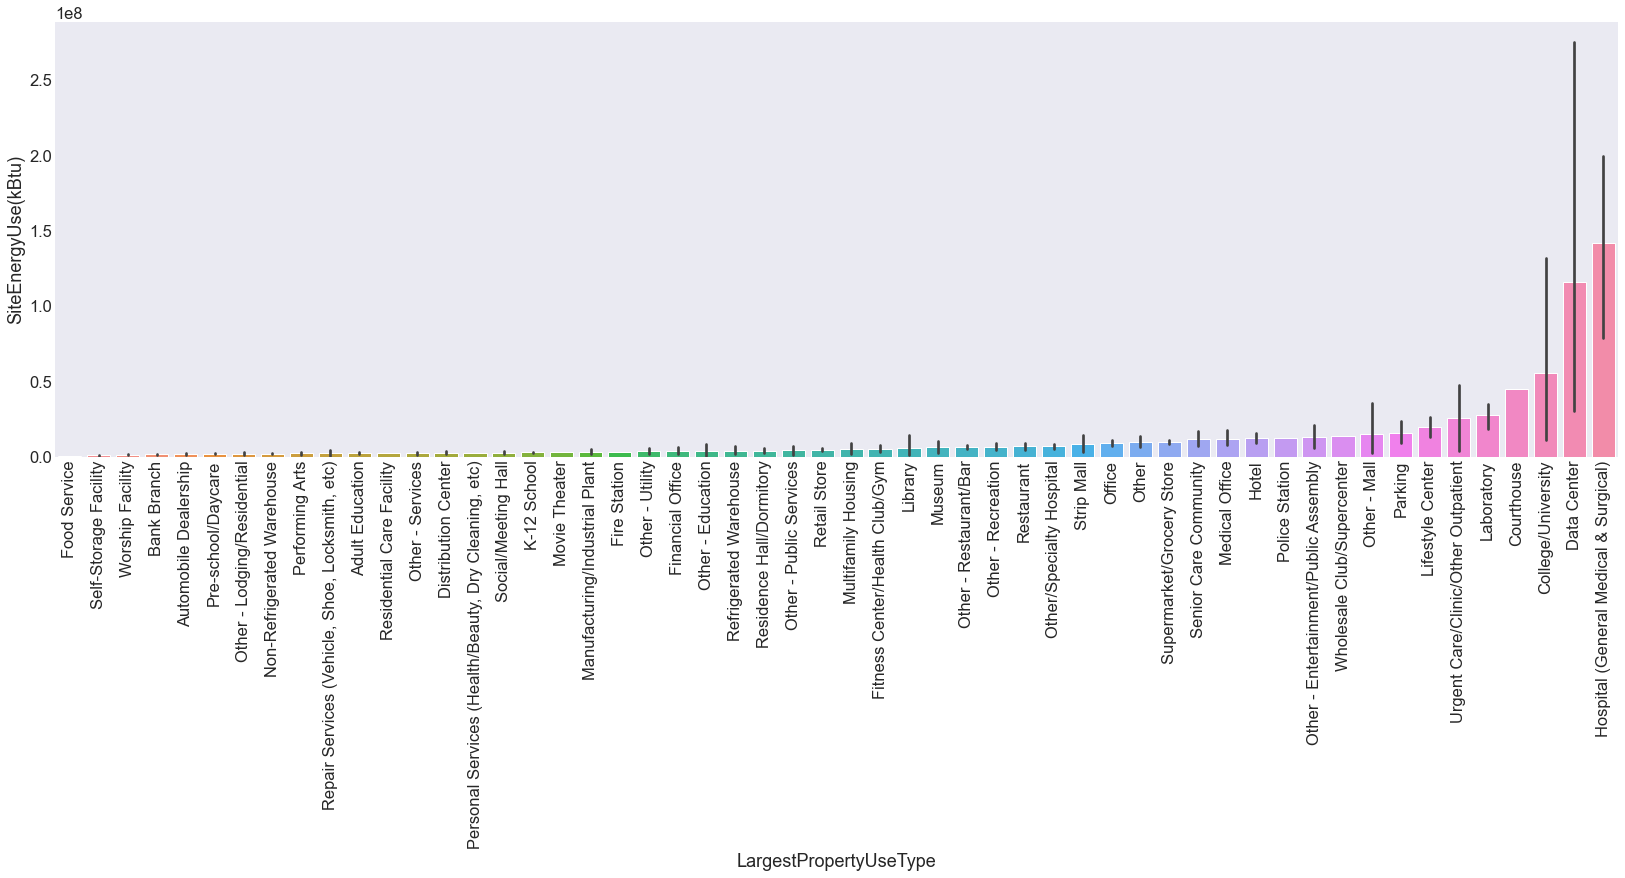

In [85]:
grouped = data.groupby(["LargestPropertyUseType"])
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.barplot(x = data['LargestPropertyUseType'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

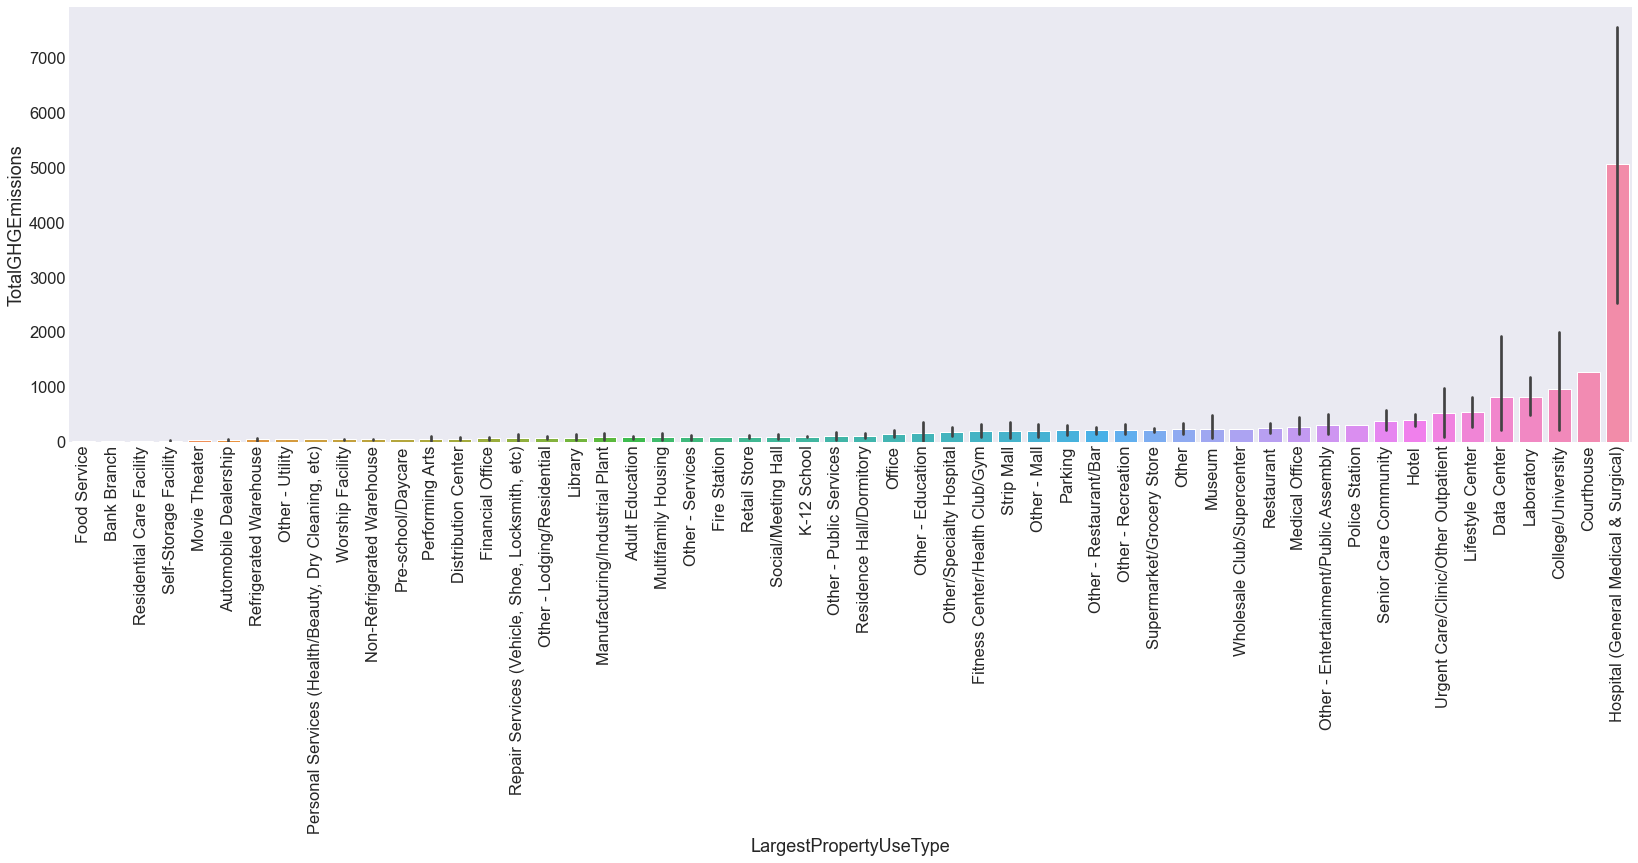

In [86]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.barplot(x = data['LargestPropertyUseType'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

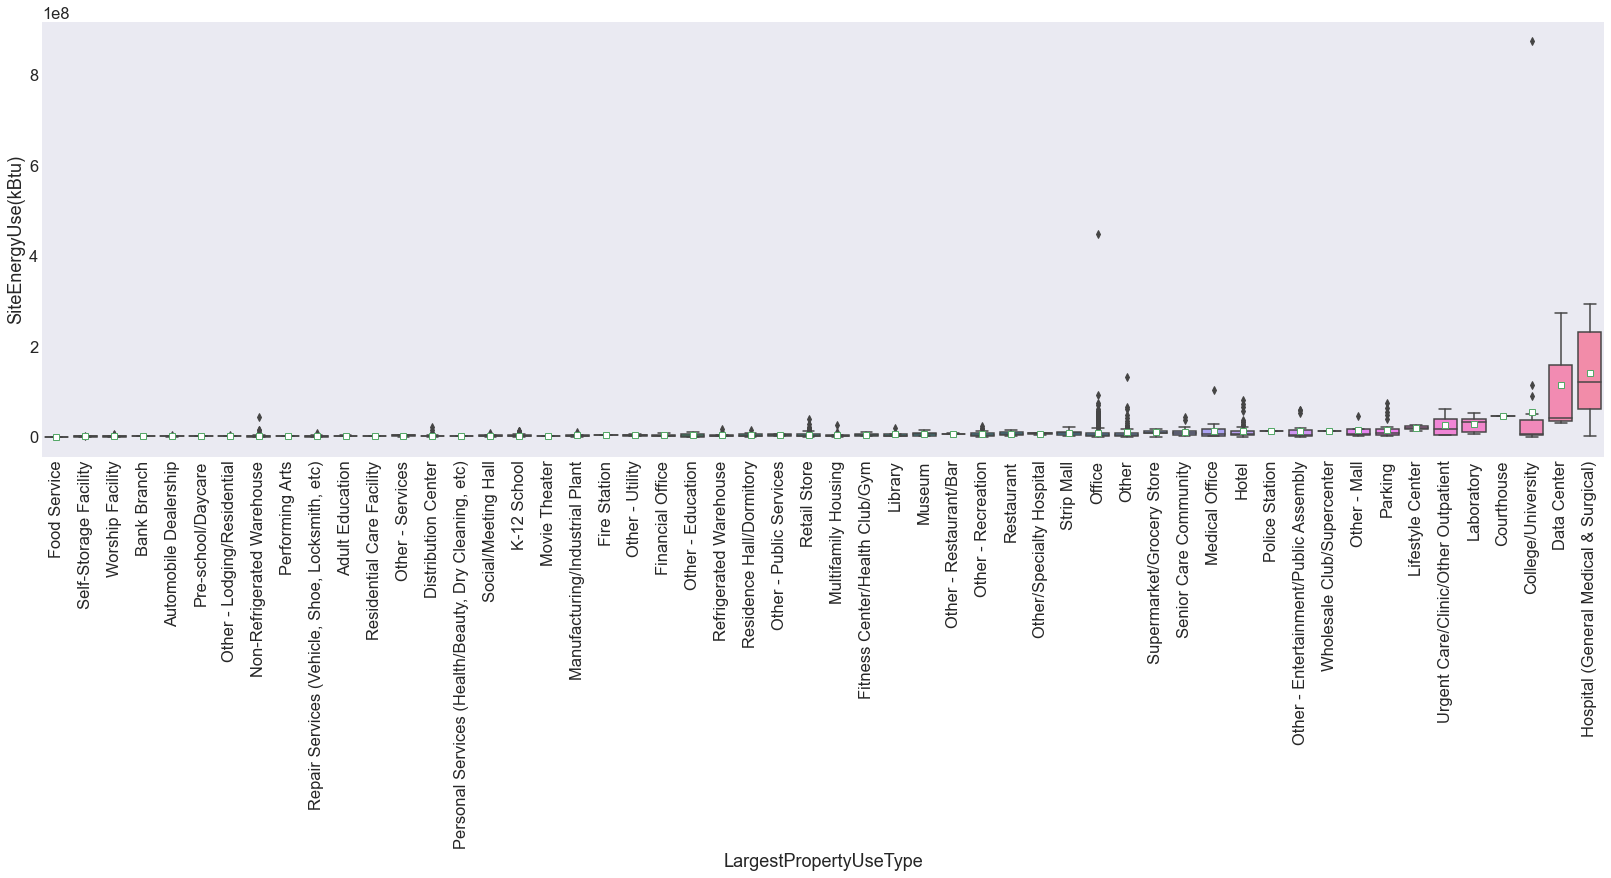

In [87]:
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.boxplot(x = data['LargestPropertyUseType'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.xticks(rotation=90)
plt.show()

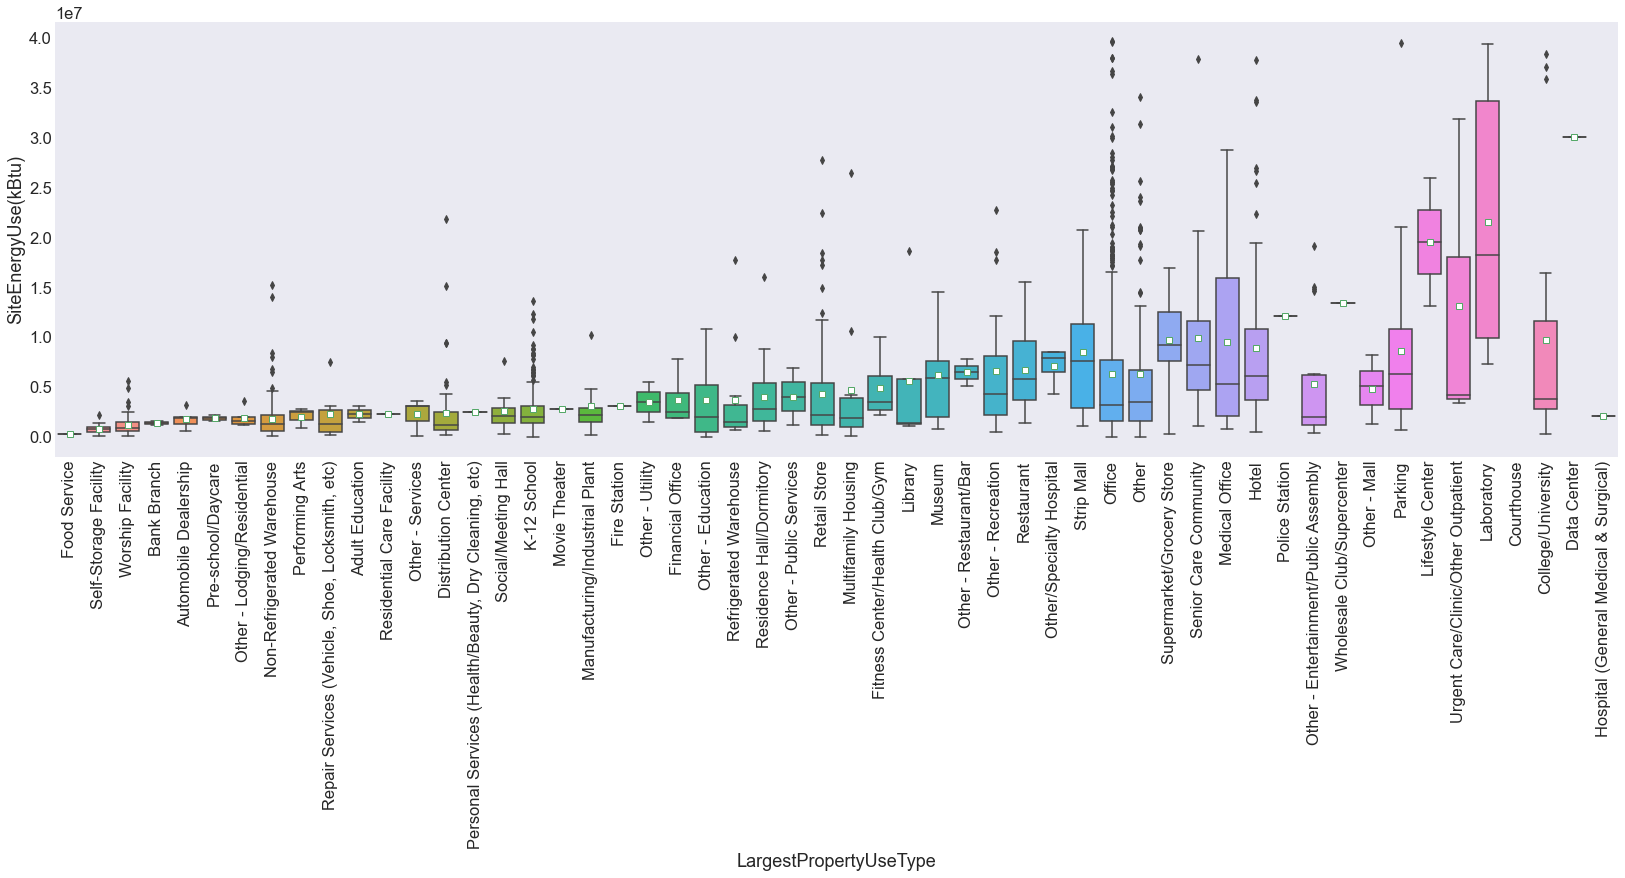

In [88]:
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.boxplot(x = data[(data['SiteEnergyUse(kBtu)']!=np.nan) & ((data['SiteEnergyUse(kBtu)']<4*10**7))]['LargestPropertyUseType'],
            y = data[(data['SiteEnergyUse(kBtu)']!=np.nan) & ((data['SiteEnergyUse(kBtu)']<4*10**7))]['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.xticks(rotation=90)
plt.show()

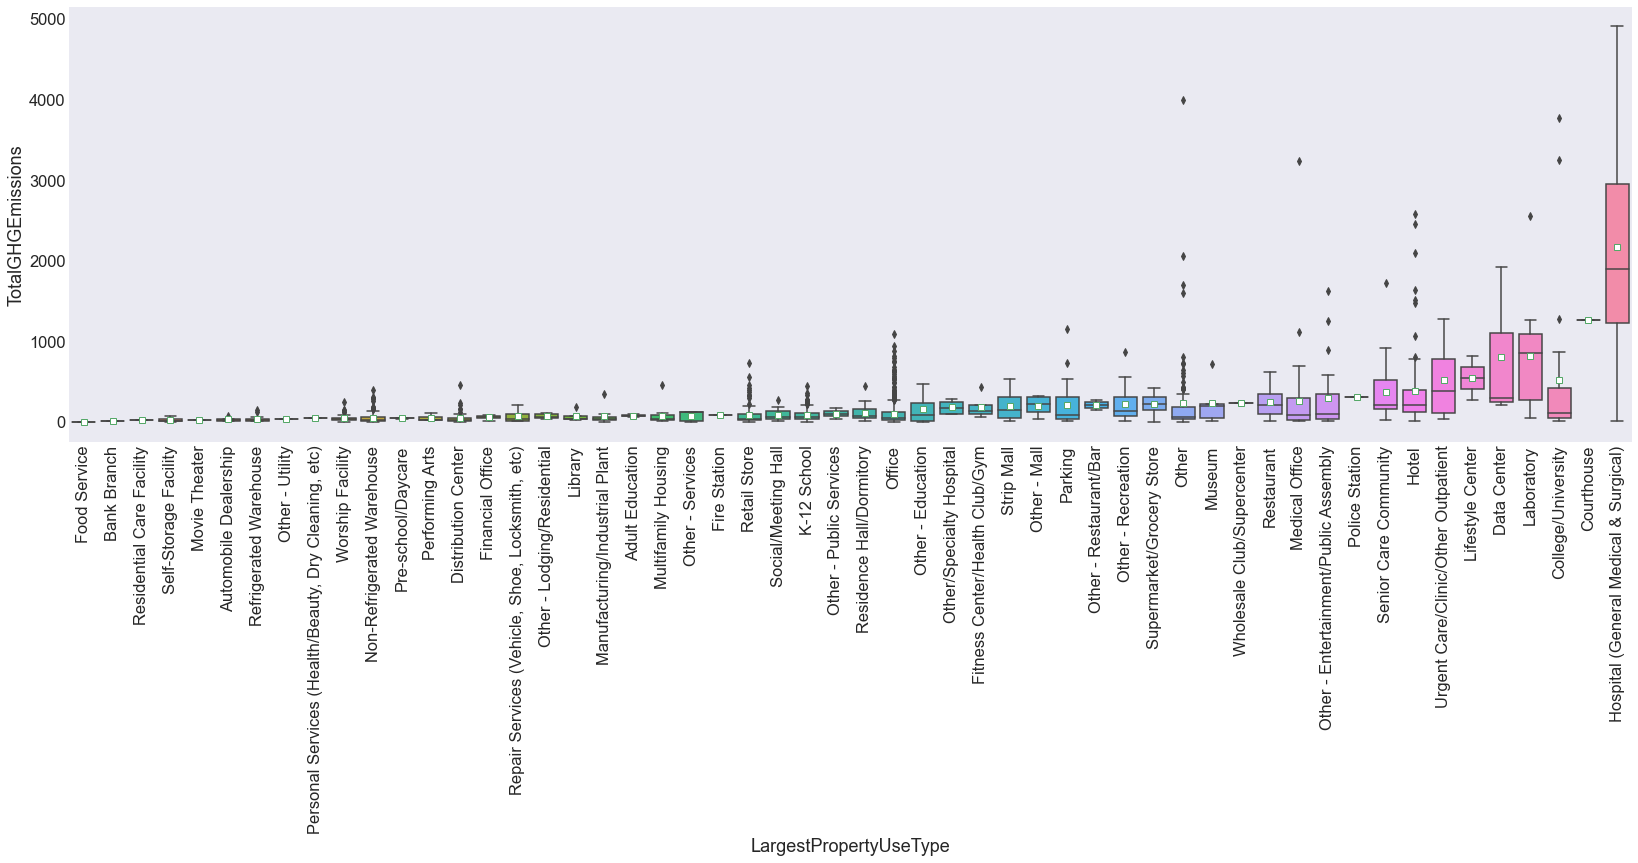

In [89]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.boxplot(x = data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<5000))]['LargestPropertyUseType'],
            y = data[(data['TotalGHGEmissions']!=np.nan) & ((data['TotalGHGEmissions']<5000))]['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            order=order,
            saturation=0.9,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.xticks(rotation=90)
plt.show()

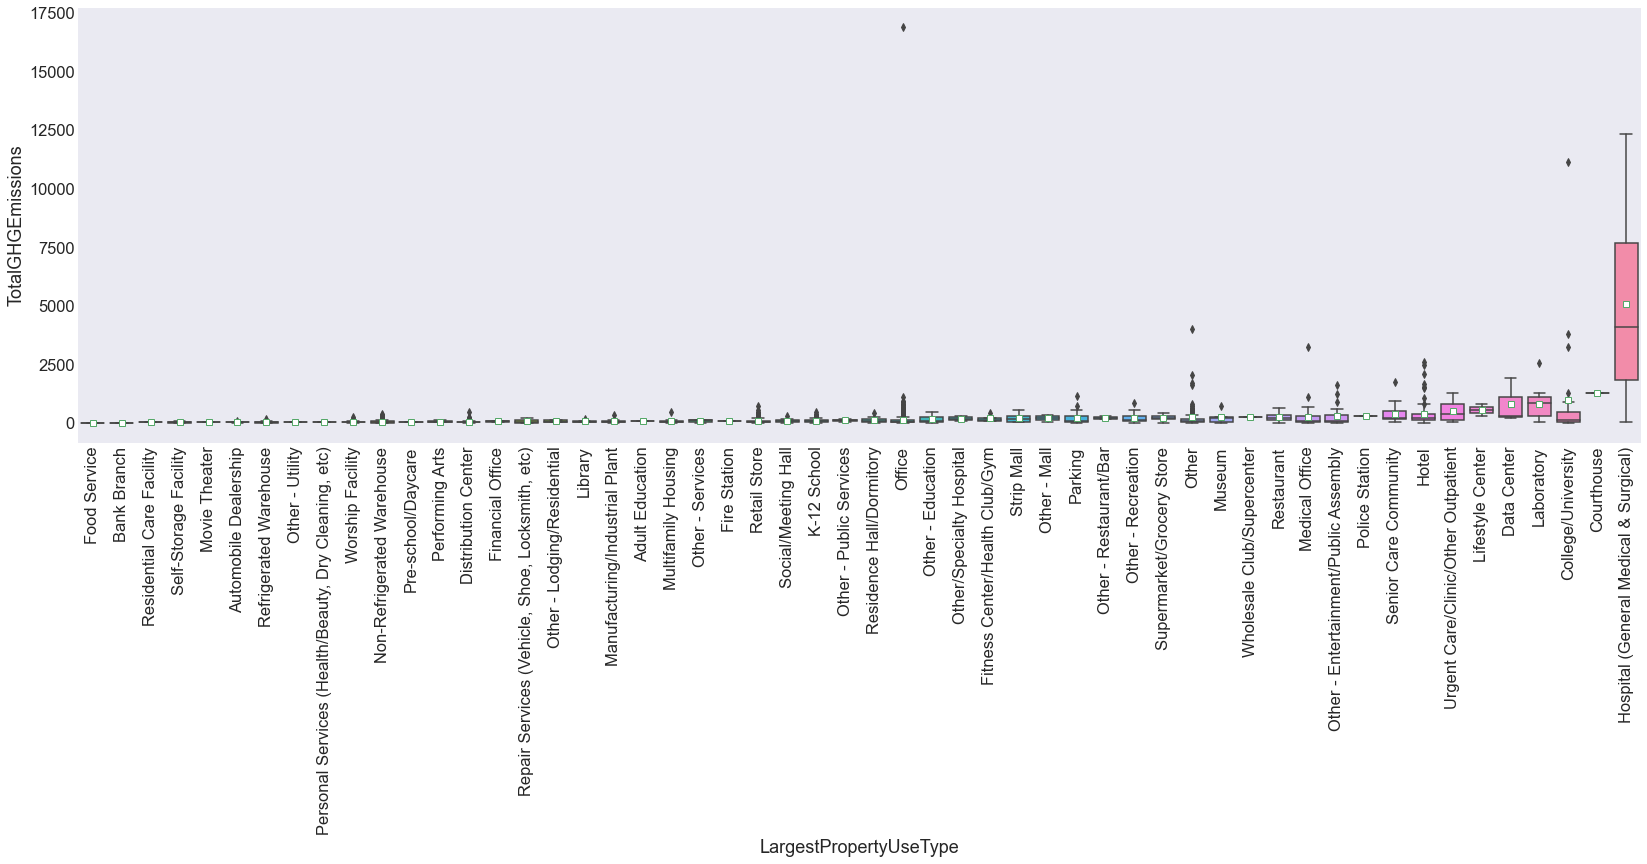

In [90]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.boxplot(x = data['LargestPropertyUseType'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            saturation=0.9,
            order=order,
            showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white"}
            #color='darkred'
           )
plt.xticks(rotation=90)
plt.show()

In [91]:
data['SecondLargestPropertyUseType'].nunique()


48

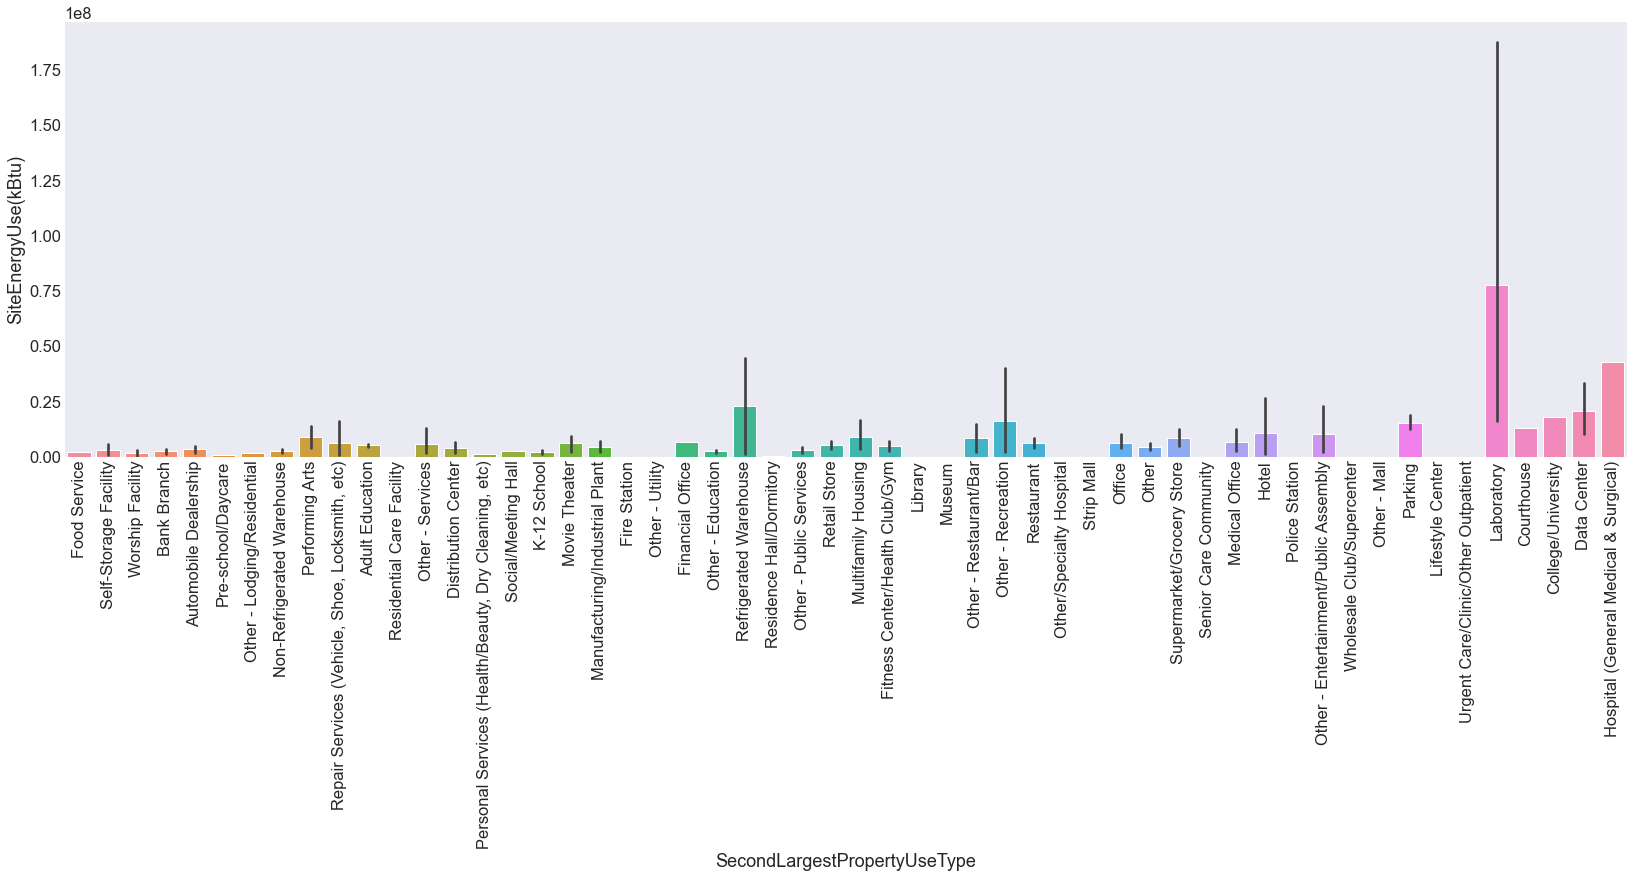

In [92]:
grouped_second = data.groupby(["SecondLargestPropertyUseType"])
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.barplot(x = data['SecondLargestPropertyUseType'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

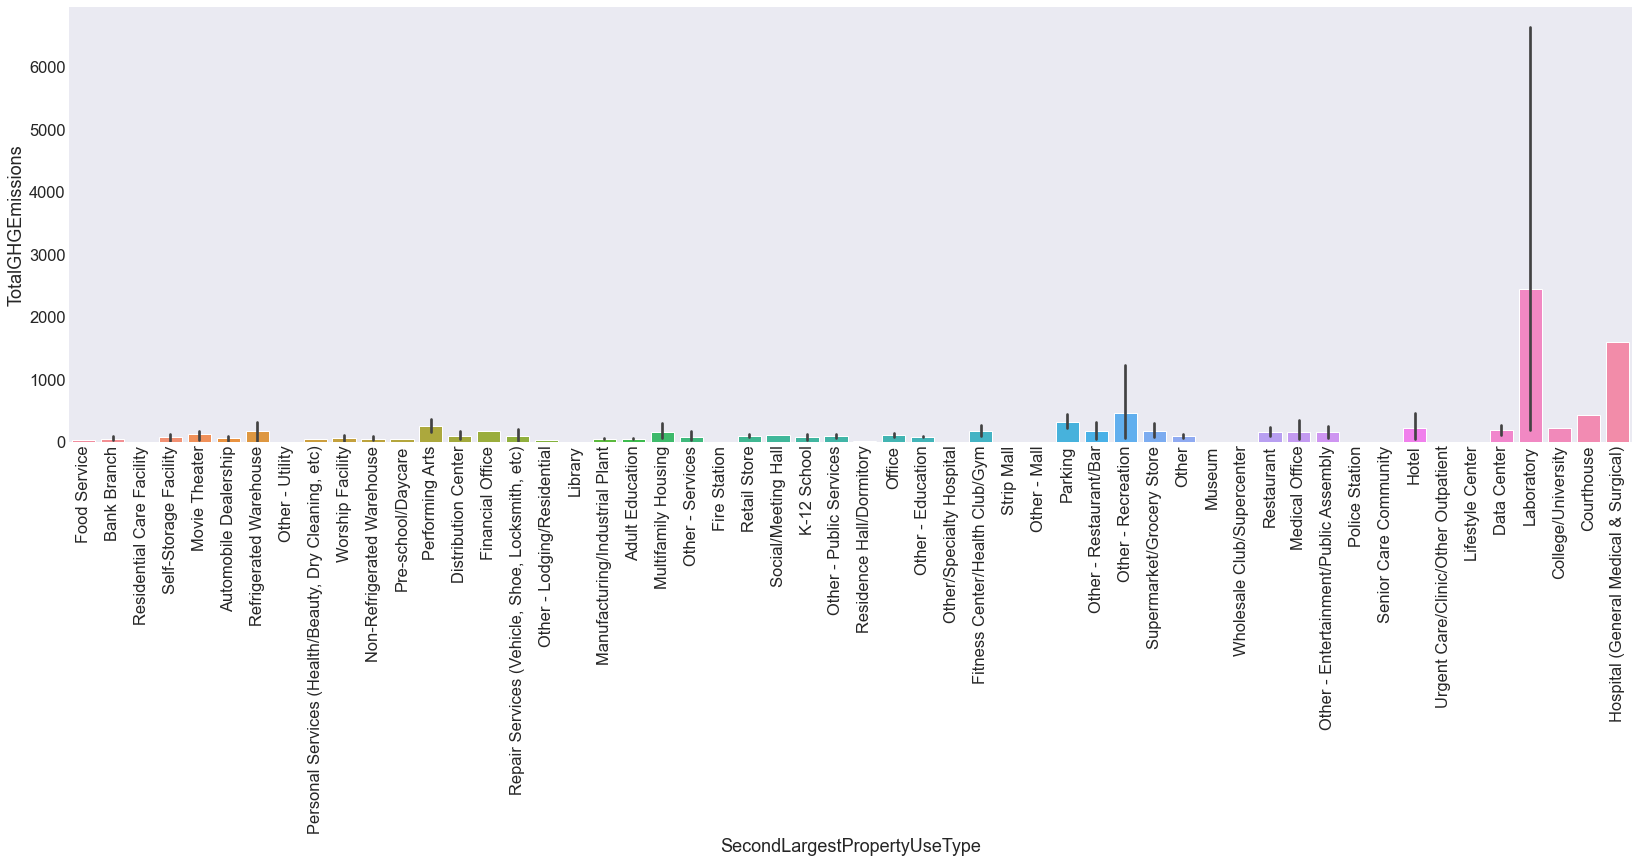

In [93]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.barplot(x = data['SecondLargestPropertyUseType'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

In [94]:
data['ThirdLargestPropertyUseType'].nunique()


40

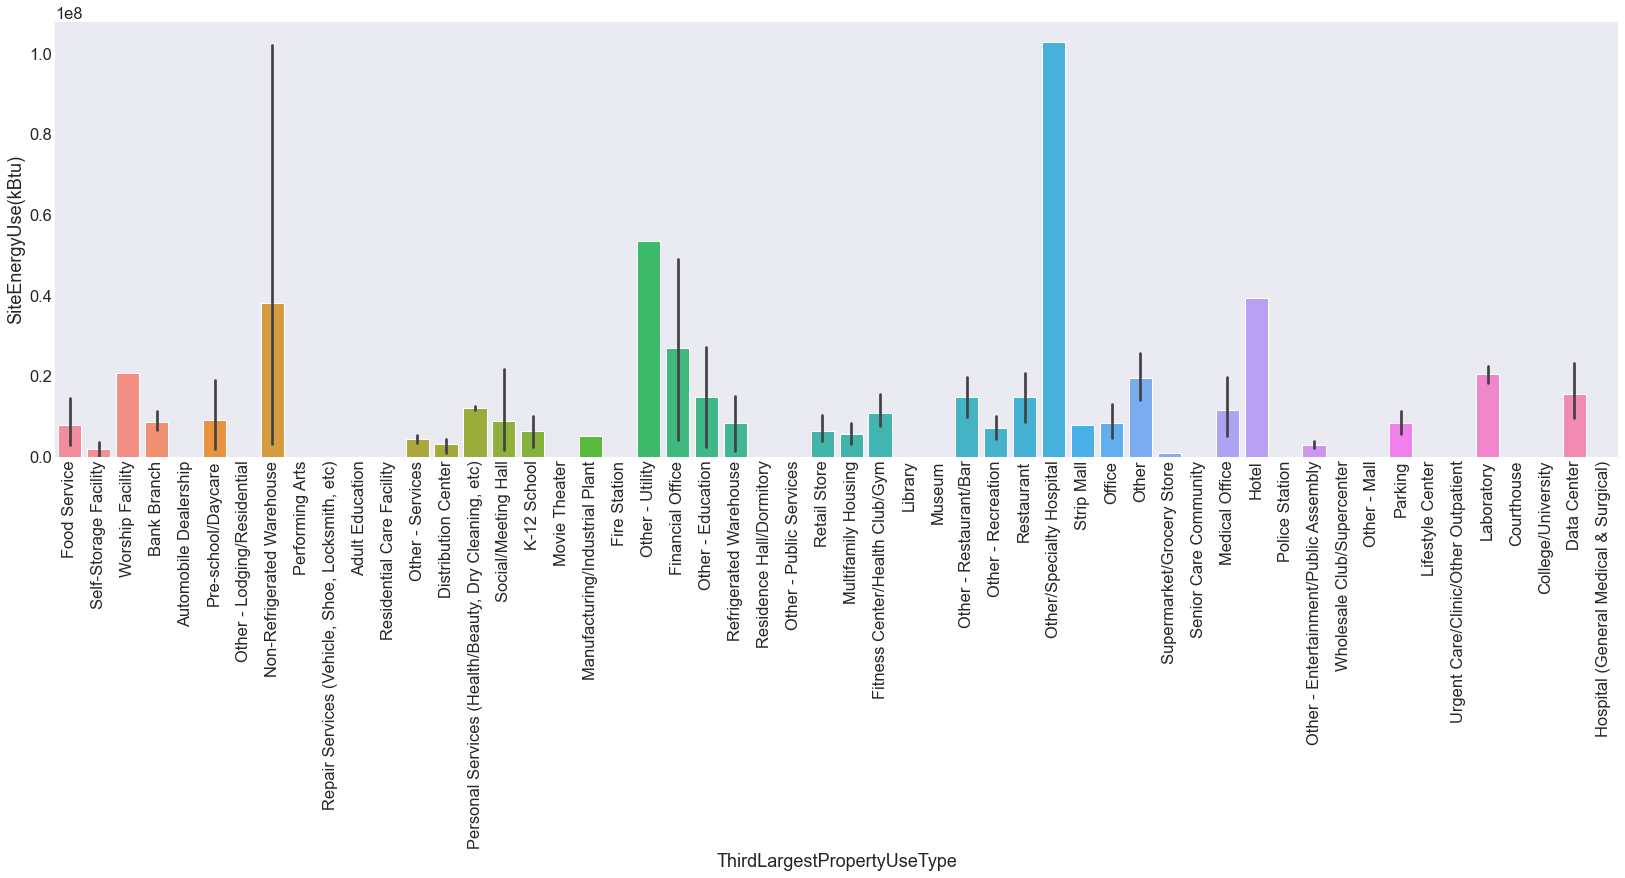

In [95]:
grouped_third = data.groupby(["ThirdLargestPropertyUseType"])
order = grouped.mean()['SiteEnergyUse(kBtu)'].sort_values().index

ax = sns.barplot(x = data['ThirdLargestPropertyUseType'],
            y = data['SiteEnergyUse(kBtu)'],
            data=data[(data['SiteEnergyUse(kBtu)']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

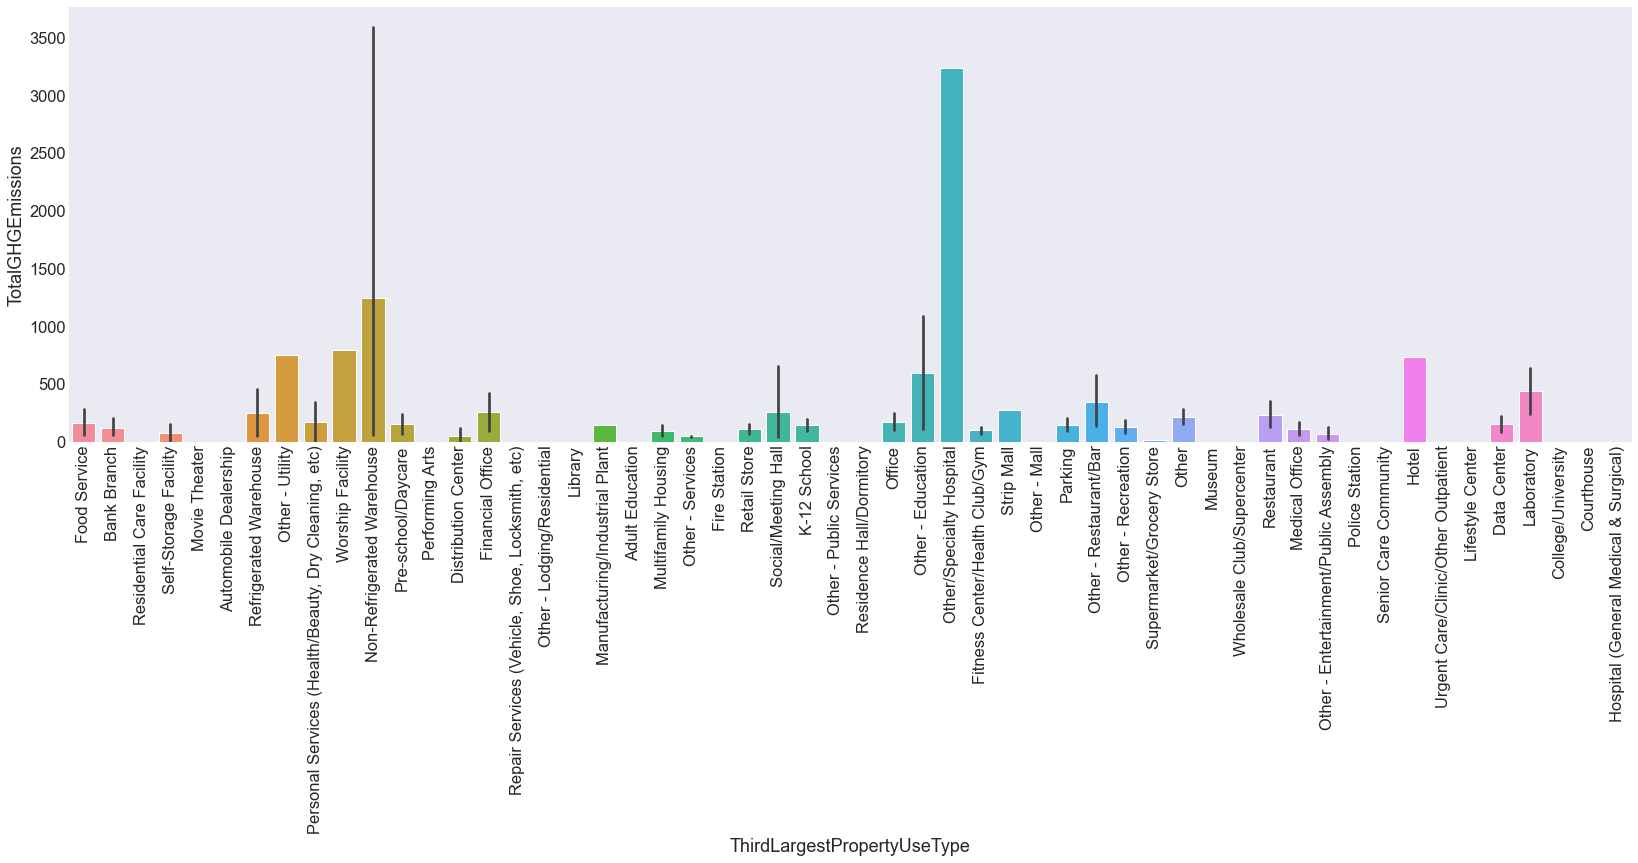

In [96]:
order = grouped.mean()['TotalGHGEmissions'].sort_values().index

ax = sns.barplot(x = data['ThirdLargestPropertyUseType'],
            y = data['TotalGHGEmissions'],
            data=data[(data['TotalGHGEmissions']!=np.nan)],
            order=order,
            saturation=0.9,
           )
plt.xticks(rotation=90)
plt.show()

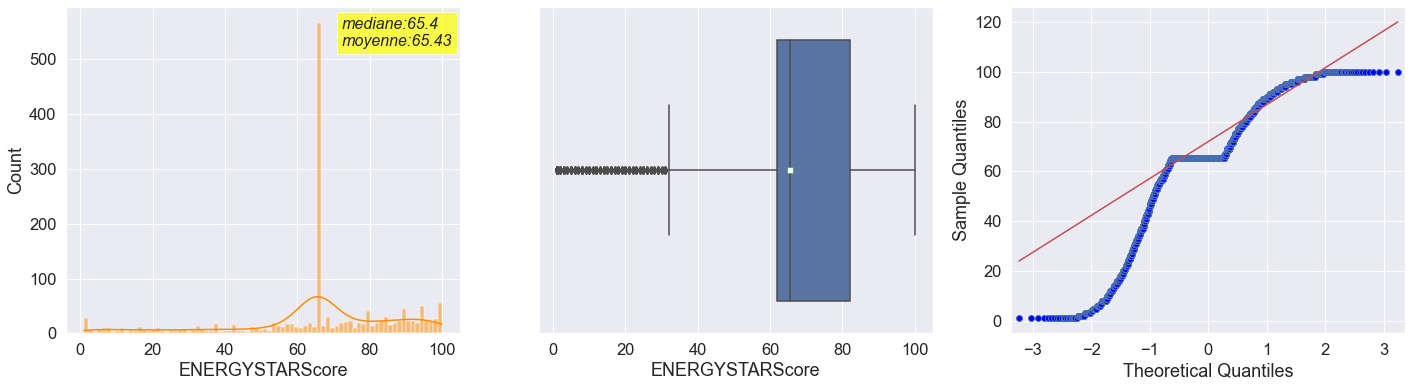

In [97]:
sns.set(
    rc={'figure.figsize': (24, 6)},
    font_scale=1.5,
)
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False)

ax = sns.histplot(data=data,
             x='ENERGYSTARScore',
             kde=True,
             ax=axes[0],
             bins=80,
             color="darkorange")
ax.text(0.7, 0.88, 'mediane:{:.3}\nmoyenne:{}'.format(data['ENERGYSTARScore'].median(), round(data['ENERGYSTARScore'].mean(),2)), style='italic', transform=ax.transAxes, fontsize = 16,
            bbox={'facecolor':'yellow', 'alpha':0.7, 'pad':5})
sns.boxplot(data=data,
            x='ENERGYSTARScore',
            ax=axes[1],
            showmeans=True,
            meanprops={
                "marker": "s",
                "markerfacecolor": "white"
            })
sm.qqplot(data['ENERGYSTARScore'], ax=axes[2], line="q")

py.show()

In [98]:

from scipy.stats import normaltest
from scipy.stats import shapiro
# normality test (normaltest)
stat, p = normaltest(data['ENERGYSTARScore'])
print('ENERGYSTARScore (normaltest): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

# normality test (shapiro)
stat, p = shapiro(data['ENERGYSTARScore'])
print('ENERGYSTARScore (Shapiro): ')
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('===='*20)

ENERGYSTARScore (normaltest): 
Statistics=205.294, p=0.000
Sample does not look Gaussian (reject H0)
ENERGYSTARScore (Shapiro): 
Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)


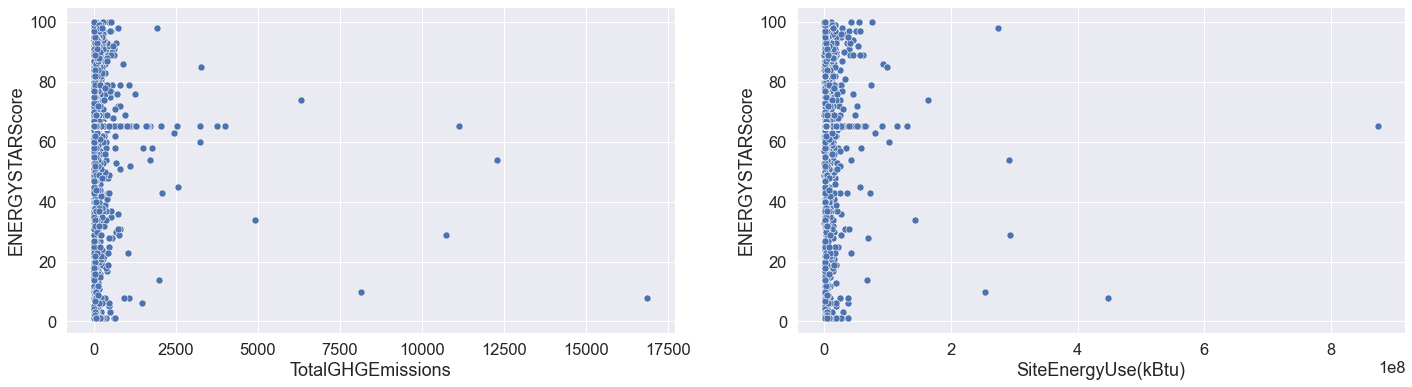

In [99]:
sns.set(
    rc={'figure.figsize': (24, 6)},
    font_scale=1.5,
)
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)

sns.scatterplot(y='ENERGYSTARScore',
                     x='TotalGHGEmissions',
                     ax=axes[0],
                     data=data,
                     s=50)
sns.scatterplot(y='ENERGYSTARScore',
                     x='SiteEnergyUse(kBtu)',
                     ax=axes[1],
                     data=data,
                     s=50)
    
plt.show()

In [100]:
used_columns = ['YearBuilt', 'AgeGroup']

data = data.drop(used_columns, axis=1)

Nous remarqons qu'il y a des feautures qui sont calculés à partir de variables 'TotalGHGEmissions' ou/et 'SiteEnergyUse(kBtu)'.

Ce sont les features avec les suffix EUI(kBtu/sf) dont les valeurs sont ramenées à la surface par étage.

Nous allons les supprimer ainsi que 'GHGEmissionsIntensity'.

In [101]:
data = data.drop(['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity'], axis=1)

In [102]:
data.shape

(1645, 31)

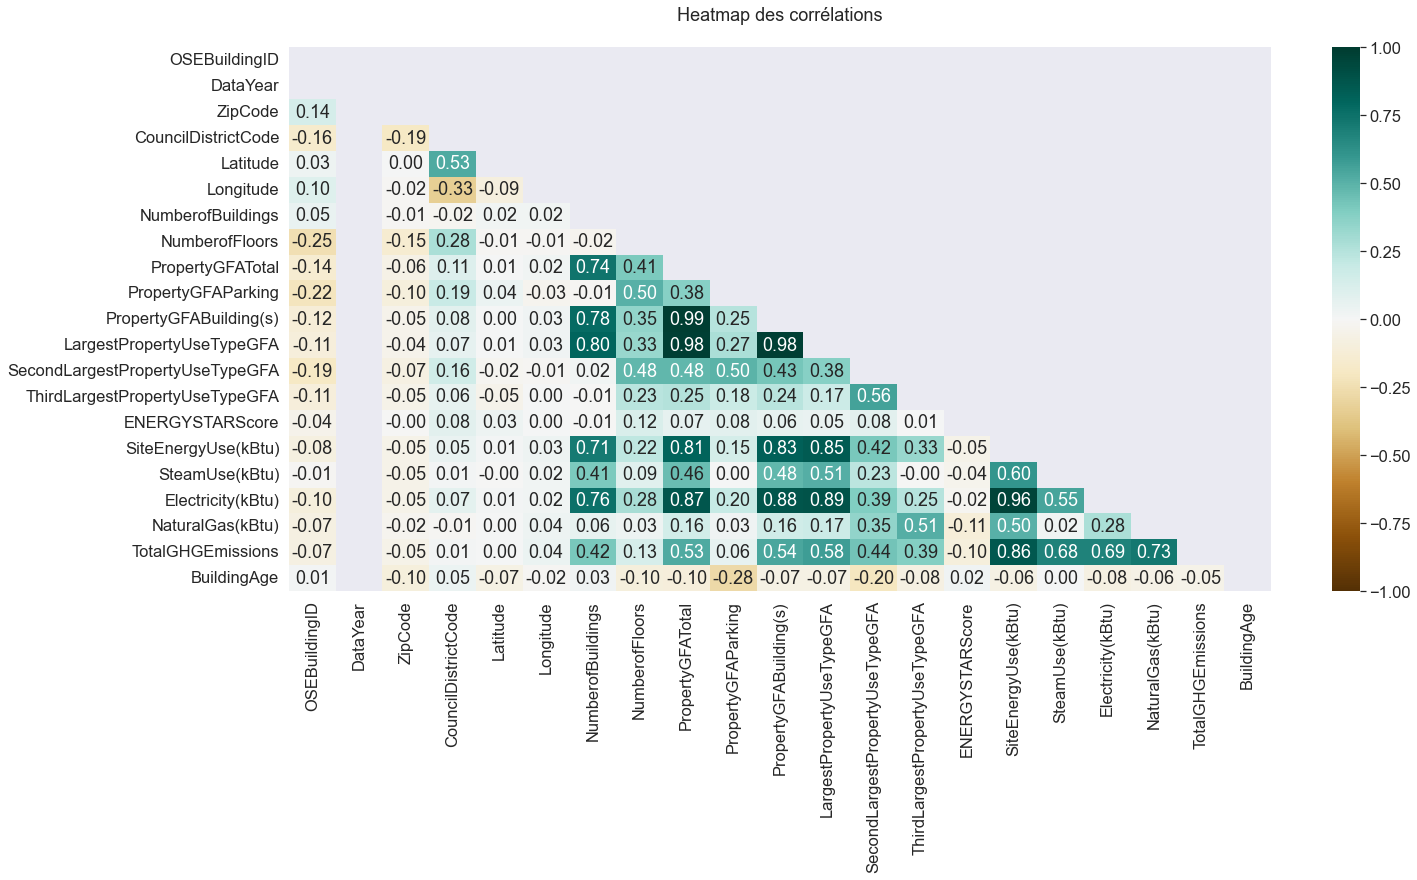

In [103]:
plt.subplots(figsize=(22, 10))
matrix = np.triu(data.corr())

ax = sns.heatmap(data.corr(),
                 annot=True,
                 mask=matrix,
                 cmap='BrBG',
                 #center=0,
                 #linewidths=.7,
                 fmt=".2f",
                vmin=-1,
                vmax=1)
ax.set_title(f'Heatmap des corrélations\n')
plt.show()

In [104]:
data.to_csv("2016_Building_Energy_Benchmarking2.csv", index=False)

In [105]:
data

OSEBuildingID  DataYear       BuildingType          PrimaryPropertyType  \
0                 1      2016     NonResidential                        Hotel   
1                 2      2016     NonResidential                        Hotel   
2                 3      2016     NonResidential                        Hotel   
3                 5      2016     NonResidential                        Hotel   
4                 8      2016     NonResidential                        Hotel   
...             ...       ...                ...                          ...   
3339          50069      2016     NonResidential  Small- and Mid-Sized Office   
3340          50070      2016     NonResidential                        Other   
3347          50081      2016     NonResidential                  K-12 School   
3356          50094      2016     NonResidential           Mixed Use Property   
3359          50101      2016  Nonresidential WA                   University   

                     PropertyName                    Address  ZipCode  \
0            Mayflower park hotel              405 Olive way  98101.0   
1                 Paramount Hotel            724 Pine street  98101.0   
2         5673-The Westin Seattle            1900 5th Avenue  98101.0   
3                       HOTEL MAX             620 STEWART ST  98101.0   
4     WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST  98121.0   
...                           ...                        ...      ...   
3339      Airport - Main Terminal         7277 Perimeter Rd.  98108.0   
3340     Tennis Center Sand Point  7135 Sportsfield Drive NE  98155.0   
3347       Hamlin Robinson School        1701 20th Ave South  98144.0   
3356                         AIBS        601 Westlake Ave N.  98109.0   
3359                 Burke Museum       4331 Memorial Way NE  98195.0   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  \
0                       7          DOWNTOWN  47.61220 -122.33799   
1                       7          DOWNTOWN  47.61317 -122.33393   
2                       7          DOWNTOWN  47.61393 -122.33810   
3                       7          DOWNTOWN  47.61412 -122.33664   
4                       7          DOWNTOWN  47.61375 -122.34047   
...                   ...               ...       ...        ...   
3339                    2  GREATER DUWAMISH  47.53161 -122.29944   
3340                    4         NORTHEAST  47.68109 -122.26180   
3347                    3  GREATER DUWAMISH  47.58831 -122.30650   
3356                    7        LAKE UNION  47.62497 -122.33883   
3359                    4         NORTHEAST  47.66127 -122.31256   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3339                1.0               2             24990                   0   
3340                1.0               1             72000                   0   
3347                1.0               3             45000                   0   
3356                1.0               6            345290               85028   
3359                1.0               1             68072                   0   

      PropertyGFABuilding(s)  \
0                      88434   
1                      88502   
2                     759392   
3                      61320   
4                     113580   
...                      ...   
3339                   24990   
3340                   72000   
3347                   45000   
3356                  260262   
3359          

In [106]:
data = pd.read_csv("2016_Building_Energy_Benchmarking2.csv")

## Création des nouveaux features 1 (check)

In [107]:
data['SteamUse_check'] = (data['SteamUse(kBtu)'] >= 0) & (data['SteamUse(kBtu)'] == 0)
data['Electricity_check'] = (data['Electricity(kBtu)'] >= 0) & (data['Electricity(kBtu)'] == 0)
data['NaturalGas_check'] = (data['NaturalGas(kBtu)'] >= 0) & (data['NaturalGas(kBtu)'] == 0)

In [108]:
data['SteamUse_check'].replace({False: 1, True: 0}, inplace=True)
data['Electricity_check'].replace({False: 1, True: 0}, inplace=True)
data['NaturalGas_check'].replace({False: 1, True: 0}, inplace=True)

## Création des nouveaux features 2 (à partir de GFA)


In [109]:
data['LP_Ratio'] = round(100 * data['LargestPropertyUseTypeGFA']/data['PropertyGFATotal'])
data['LP_Ratio'] = data['LP_Ratio'].astype('int64')

data['SLP_Ratio'] = round(100 * data['SecondLargestPropertyUseTypeGFA']/data['PropertyGFATotal'])
data['SLP_Ratio'] = data['SLP_Ratio'].astype('int64')

data['TLP_Ratio'] = round(100 * data['ThirdLargestPropertyUseTypeGFA']/data['PropertyGFATotal'])
data['TLP_Ratio'] = data['TLP_Ratio'].astype('int64')

In [110]:
data

OSEBuildingID  DataYear       BuildingType          PrimaryPropertyType  \
0                 1      2016     NonResidential                        Hotel   
1                 2      2016     NonResidential                        Hotel   
2                 3      2016     NonResidential                        Hotel   
3                 5      2016     NonResidential                        Hotel   
4                 8      2016     NonResidential                        Hotel   
...             ...       ...                ...                          ...   
1640          50069      2016     NonResidential  Small- and Mid-Sized Office   
1641          50070      2016     NonResidential                        Other   
1642          50081      2016     NonResidential                  K-12 School   
1643          50094      2016     NonResidential           Mixed Use Property   
1644          50101      2016  Nonresidential WA                   University   

                     PropertyName                    Address  ZipCode  \
0            Mayflower park hotel              405 Olive way  98101.0   
1                 Paramount Hotel            724 Pine street  98101.0   
2         5673-The Westin Seattle            1900 5th Avenue  98101.0   
3                       HOTEL MAX             620 STEWART ST  98101.0   
4     WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST  98121.0   
...                           ...                        ...      ...   
1640      Airport - Main Terminal         7277 Perimeter Rd.  98108.0   
1641     Tennis Center Sand Point  7135 Sportsfield Drive NE  98155.0   
1642       Hamlin Robinson School        1701 20th Ave South  98144.0   
1643                         AIBS        601 Westlake Ave N.  98109.0   
1644                 Burke Museum       4331 Memorial Way NE  98195.0   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  \
0                       7          DOWNTOWN  47.61220 -122.33799   
1                       7          DOWNTOWN  47.61317 -122.33393   
2                       7          DOWNTOWN  47.61393 -122.33810   
3                       7          DOWNTOWN  47.61412 -122.33664   
4                       7          DOWNTOWN  47.61375 -122.34047   
...                   ...               ...       ...        ...   
1640                    2  GREATER DUWAMISH  47.53161 -122.29944   
1641                    4         NORTHEAST  47.68109 -122.26180   
1642                    3  GREATER DUWAMISH  47.58831 -122.30650   
1643                    7        LAKE UNION  47.62497 -122.33883   
1644                    4         NORTHEAST  47.66127 -122.31256   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
1640                1.0               2             24990                   0   
1641                1.0               1             72000                   0   
1642                1.0               3             45000                   0   
1643                1.0               6            345290               85028   
1644                1.0               1             68072                   0   

      PropertyGFABuilding(s)  \
0                      88434   
1                      88502   
2                     759392   
3                      61320   
4                     113580   
...                      ...   
1640                   24990   
1641                   72000   
1642                   45000   
1643                  260262   
1644          

## la baseline

In [111]:
identity = [
    'OSEBuildingID',
    'PropertyName',
]

features_cat = [
    'PrimaryPropertyType'
]

features_num = [
    'NumberofBuildings',
    'PropertyGFATotal',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    'ZipCode',
    'SteamUse_check',
    'NaturalGas_check',
    'Electricity_check',
    'LP_Ratio',
    'SLP_Ratio',
    'TLP_Ratio',
]

features_high_corr = [
    'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'Electricity(kBtu)'
]

to_predict = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

energystar = ['ENERGYSTARScore']

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1645 non-null   int64  
 1   DataYear                         1645 non-null   int64  
 2   BuildingType                     1645 non-null   object 
 3   PrimaryPropertyType              1645 non-null   object 
 4   PropertyName                     1645 non-null   object 
 5   Address                          1645 non-null   object 
 6   ZipCode                          1645 non-null   float64
 7   CouncilDistrictCode              1645 non-null   int64  
 8   Neighborhood                     1645 non-null   object 
 9   Latitude                         1645 non-null   float64
 10  Longitude                        1645 non-null   float64
 11  NumberofBuildings                1645 non-null   float64
 12  NumberofFloors      

In [113]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score

X = data[['BuildingAge', 'NumberofFloors']]
y = data['SiteEnergyUse(kBtu)'].values

column_trans = make_column_transformer(
    (OneHotEncoder(), features_cat),  # encodage
    (StandardScaler(), features_num),  # standardisation
    remainder='passthrough')

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2,
    random_state=42)  # 20% des données dans le jeu de test

print(f"La taille de données d'entrainement : {X_train.shape[0]}")
print(f"La taille de données d'entrainement : {X_test.shape[0]}")

La taille de données d'entrainement : 1316
La taille de données d'entrainement : 329


In [115]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [116]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [117]:
print("Le score R^2 de la performance du modèle baseline : {:.4f}".format(r2_score(y_test, y_pred)))

Le score R^2 de la performance du modèle baseline : 0.0885


In [118]:
lin_reg.intercept_


6320340.924841305

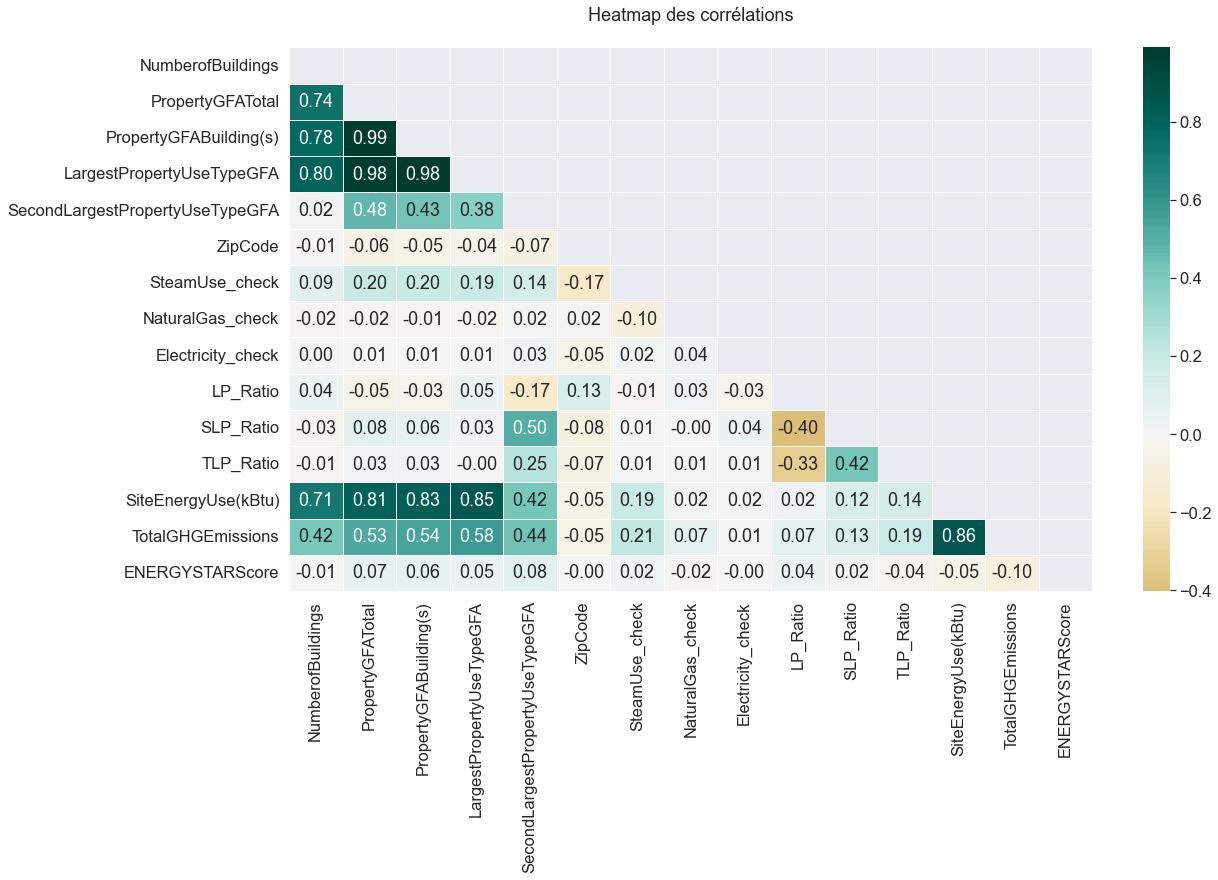

In [119]:
plt.subplots(figsize=(18, 10))
matrix = np.triu(data[features_num + to_predict + energystar].corr())

ax = sns.heatmap(data[features_num + to_predict + energystar].corr(),
                 annot=True,
                 fmt=".2f",
                 mask=matrix,
                 cmap='BrBG',
                 center=0,
                 linewidths=.5
                )
ax.set_title(f'Heatmap des corrélations\n')
plt.show()

In [120]:
data.to_csv("2016_Building_Energy_Benchmarking3.csv", index=False)